## Loading some libraries

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings




In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("Data Loading").getOrCreate()

# Read CSV file into PySpark DataFrame
raw_df = spark.read.csv('training.csv', header=True, inferSchema=True)
raw_df_ = spark.read.csv('training.csv', header=True, inferSchema=True)

# Show some data (optional, for verification)
raw_df.show()

# Stop the Spark session when done (optional, typically at the end of the script)
spark.stop()


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+-------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId| Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+-------+-----+--------------------+---------------+-----------+
| TransactionId_76871| BatchId_36123|AccountId_3957| SubscriptionId_887|CustomerId_4406|         UGX|        256|ProviderId_6|ProductId_10|           airtime|ChannelId_3| 1000.0| 1000| 2018-11-15 02:18:49|              2|          0|
| TransactionId_73770| BatchId_15642|AccountId_4841|Subscription

# 0. Checking amount (Given in Data Description)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import min as pyspark_min

# Starting a Spark Session and storing it in spark variable
spark = SparkSession.builder.appName("Min Value Example").getOrCreate()

# Reading the training file which is the input data file as the raw_df
raw_df = spark.read.csv('training.csv', header=True, inferSchema=True)

# Finding minimum value of the Amount attribute
min_value = raw_df.agg(pyspark_min("Amount")).collect()[0][0]

# Print output -  minimum value
print("Minimum value in Amount column:", min_value)



Minimum value in Amount column: -1000000.0


In [ ]:
from pyspark.sql.functions import max as pyspark_max

# Finding maximum value of the Amount attribute
max_value = raw_df.agg(pyspark_max("Amount")).collect()[0][0]

# Print output -  maximum value
print("Maximum value in Amount column:", max_value)


Maximum value in Amount column: 9880000.0


#### __I think we should do a cluster/partition based analysis on debits and credits data seperately.__

In [ ]:

# Credits subsetting done here where Amount attribute  is less than 0 since minimum value is -1000000.0
credits_raw_df = raw_df.filter(raw_df.Amount < 0)

# Debits subsetting where Amount attribute is greater than 0
raw_df = raw_df.filter(raw_df.Amount > 0)

# Counting  the number of rows in each DataFrame
credits_count = credits_raw_df.count()
debits_count = raw_df.count()

# Print the shape (number of rows) of each DataFrame
print("Shape of credits_raw_df:", credits_count)
print("Shape of raw_df:", debits_count)


Shape of credits_raw_df: 38189
Shape of raw_df: 57473


# 2. Analysing Debit Data  

In [ ]:
# checking the unique values of customers attribute

# Counting  the number of unique customers in the unique_customers_count
unique_customers_count = raw_df.select("CustomerId").distinct().count()

# Printng the number of unique customers
print("Number of unique customers:", unique_customers_count)


Number of unique customers: 3632


In [ ]:
# checking the unique values of accounts attribute

unique_accounts_count = raw_df.select("AccountId").distinct().count()
print("Number of unique accounts:", unique_accounts_count)


Number of unique accounts: 3626


In [ ]:
# checking the unique values of Subscription IDs attribute

unique_subscription_count = raw_df.select("SubscriptionId").distinct().count()
print("Number of unique Subscription IDs:", unique_subscription_count)


Number of unique Subscription IDs: 3622


In [ ]:
## checking the unique values of ProviderId values


unique_providers_count = raw_df.select("ProviderId").distinct().count()

# creating a list
unique_providers_list = [row['ProviderId'] for row in raw_df.select("ProviderId").distinct().collect()]

print("Number of unique providers:", unique_providers_count)
print("Unique providers:", unique_providers_list)


Number of unique providers: 5
Unique providers: ['ProviderId_2', 'ProviderId_3', 'ProviderId_5', 'ProviderId_1', 'ProviderId_6']


In [ ]:
# checking the unique values of ProductId values


unique_products_count = raw_df.select("ProductId").distinct().count()

# creating a list
unique_products_list = [row['ProductId'] for row in raw_df.select("ProductId").distinct().collect()]


print("Number of unique products:", unique_products_count)
print("Unique products:", unique_products_list)


Number of unique products: 22
Unique products: ['ProductId_14', 'ProductId_2', 'ProductId_12', 'ProductId_20', 'ProductId_15', 'ProductId_21', 'ProductId_24', 'ProductId_11', 'ProductId_16', 'ProductId_7', 'ProductId_27', 'ProductId_5', 'ProductId_4', 'ProductId_9', 'ProductId_22', 'ProductId_1', 'ProductId_13', 'ProductId_10', 'ProductId_8', 'ProductId_3', 'ProductId_19', 'ProductId_6']
Is Product ID specific_product_id present: False


In [ ]:
# Count the number of unique PricingStrategy values
unique_pricing_strategies_count = raw_df.select("PricingStrategy").distinct().count()

# Creating a list of it
unique_pricing_strategies_list = [row['PricingStrategy'] for row in raw_df.select("PricingStrategy").distinct().collect()]

print("Number of unique pricing strategies:", unique_pricing_strategies_count)
print("Unique pricing strategies:", unique_pricing_strategies_list)


Number of unique pricing strategies: 4
Unique pricing strategies: [1, 4, 2, 0]


In [ ]:

# Counting the number of unique ProductCategory values
unique_product_categories_count = raw_df.select("ProductCategory").distinct().count()

# create a list of it
unique_product_categories_list = [row['ProductCategory'] for row in raw_df.select("ProductCategory").distinct().collect()]


print("Number of unique product categories:", unique_product_categories_count)
print("Unique product categories:", unique_product_categories_list)


Number of unique product categories: 9
Unique product categories: ['ticket', 'tv', 'other', 'airtime', 'transport', 'data_bundles', 'movies', 'utility_bill', 'financial_services']


In [ ]:
# Count the number of unique ChannelId values
unique_channels_count = raw_df.select("ChannelId").distinct().count()

# Collect  as a list
unique_channels_list = [row['ChannelId'] for row in raw_df.select("ChannelId").distinct().collect()]

# Print the number of unique channels
print("Number of unique channels:", unique_channels_count)
print("Unique channels:", unique_channels_list)

# Check for specific channels
channel_2_present = 2 in unique_channels_list
channel_5_present = 5 in unique_channels_list
print("Is Channel 2 present:", channel_2_present)
print("Is Channel 5 present:", channel_5_present)


Number of unique channels: 2
Unique channels: ['ChannelId_1', 'ChannelId_3']
Is Channel 2 present: False
Is Channel 5 present: False


# 3. Analysing Credits Data

In [ ]:
# Count the number of unique customers in credits_raw_df
unique_customers_credits_count = credits_raw_df.select("CustomerId").distinct().count()


print("Number of unique customers in credits:", unique_customers_credits_count)


Number of unique customers in credits: 2751


In [ ]:

# Count the number of unique accounts in credits_raw_df
unique_accounts_credits_count = credits_raw_df.select("AccountId").distinct().count()


print("Number of unique accounts in credits:", unique_accounts_credits_count)


Number of unique accounts in credits: 8


In [ ]:
## How many Unique Subcsription ID ?

# Count the number of unique SubscriptionId values in credits_raw_df
unique_subscription_ids_credits_count = credits_raw_df.select("SubscriptionId").distinct().count()


print("Number of unique Subscription IDs in credits:", unique_subscription_ids_credits_count)


Number of unique Subscription IDs in credits: 6


In [ ]:
## How many Unique Providers ?

# Assuming credits_raw_df is your PySpark DataFrame, filtered from raw_df with the condition raw_df.Amount < 0


unique_providers_credits_count = credits_raw_df.select("ProviderId").distinct().count()
unique_providers_credits_list = [row['ProviderId'] for row in credits_raw_df.select("ProviderId").distinct().collect()]


print("Number of unique providers in credits:", unique_providers_credits_count)
print("Unique providers in credits:", unique_providers_credits_list)




Number of unique providers in credits: 1
Unique providers in credits: ['ProviderId_4']


In [ ]:
## How many Unique products?

# Count the number of unique ProductId values in credits_raw_df
unique_products_credits_count = credits_raw_df.select("ProductId").distinct().count()

print("Number of unique products in credits:", unique_products_credits_count)


Number of unique products in credits: 16


In [ ]:
## How many unique provider category?

# Count the number of unique ProductCategory values in credits_raw_df
unique_product_categories_credits_count = credits_raw_df.select("ProductCategory").distinct().count()

# Collect the unique ProductCategory values as a list
unique_product_categories_credits_list = [row['ProductCategory'] for row in credits_raw_df.select("ProductCategory").distinct().collect()]

# Print the number of unique product categories and the list of unique product categories in credits_raw_df
print("Number of unique product categories in credits:", unique_product_categories_credits_count)
print("Unique product categories in credits:", unique_product_categories_credits_list)


## there are no transport, other, ticket categories when compared to debits data, i beleive or data isnt there or there wasnt a credit happend for these catgories.

Number of unique product categories in credits: 6
Unique product categories in credits: ['tv', 'airtime', 'data_bundles', 'movies', 'utility_bill', 'financial_services']


In [ ]:
## How many Unique channels ?

# Count the number of unique ChannelId values in credits_raw_df
unique_channels_credits_count = credits_raw_df.select("ChannelId").distinct().count()
unique_channels_credits_list = [row['ChannelId'] for row in credits_raw_df.select("ChannelId").distinct().collect()]

print("Number of unique channels in credits:", unique_channels_credits_count)
print("Unique channels in credits:", unique_channels_credits_list)


Number of unique channels in credits: 2
Unique channels in credits: ['ChannelId_5', 'ChannelId_2']


In [ ]:
## How many Unique pricing strategy ?
# Count the number of unique PricingStrategy values in credits_raw_df
unique_pricing_strategies_credits_count = credits_raw_df.select("PricingStrategy").distinct().count()


unique_pricing_strategies_credits_list = [row['PricingStrategy'] for row in credits_raw_df.select("PricingStrategy").distinct().collect()]
print("Number of unique pricing strategies in credits:", unique_pricing_strategies_credits_count)
print("Unique pricing strategies in credits:", unique_pricing_strategies_credits_list)


Number of unique pricing strategies in credits: 3
Unique pricing strategies in credits: [4, 2, 0]


## Initial Observations:-

1. When comparing credit and debit data, there are certain data points specifically for credit or debit data.
   Ex:- Credits data has only channels 2 and 5, While debits data has channels 1 and 3, Also Pricing strategy 1 isn't present in Credits data.

3. These types of things will help a decision-tree-based model to perform really well and break down this complex relationship

4. There were some missing categories in credit data when compared to debit data
   Ex:- Other, ticket, transport categories

5. There is only a single provider 4 for credit data when compared to debit data. Good for the DT-based model.

6. There is only 3 pricing strategy in credit data when compared to debit data which has 4 strategies. This 1 could be a good differentiator in DT model.

7. No nulls and duplicates


# 4. DEBITS DATA ANALYSIS

### 4.1 Exploring basic stats and dataset

In [ ]:

# shows only the first 5 rows of the raw_df
raw_df.show(5)


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+---------------+-----------+-------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|ProductCategory|  ChannelId| Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+---------------+-----------+-------+-----+--------------------+---------------+-----------+
| TransactionId_76871| BatchId_36123|AccountId_3957| SubscriptionId_887|CustomerId_4406|         UGX|        256|ProviderId_6|ProductId_10|        airtime|ChannelId_3| 1000.0| 1000| 2018-11-15 02:18:49|              2|          0|
| TransactionId_26203| BatchId_53941|AccountId_4229| SubscriptionId_222|Cust

In [ ]:

num_rows = raw_df.count()
num_columns = len(raw_df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 57473
Number of columns: 16


In [ ]:
# Importing the mean  function
from pyspark.sql.functions import mean as _mean

# Calculating  the mean of the Amount column
average_amount = raw_df.agg(_mean("Amount").alias("average_amount")).collect()[0]["average_amount"]


print("Average Amount:", average_amount)


Average Amount: 13794.246620152071


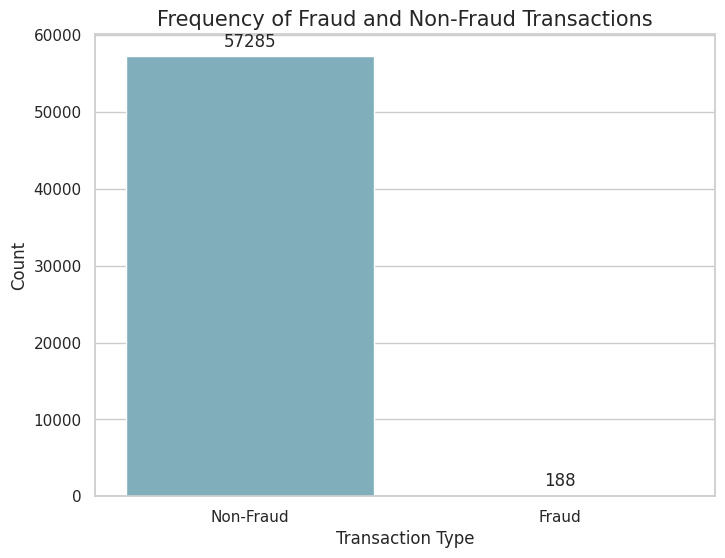

In [ ]:
## Frequency of Target Variable

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Converting Spark DataFrame to Pandas DataFrame for visualization
pandas_df = raw_df.select("FraudResult").toPandas()



# Assuming you have a DataFrame 'raw_df' and a column 'FraudResult'
data = np.array(pandas_df.FraudResult.values)

# Calculate the count of 1s and 0s
count_1 = np.sum(data == 1)
count_0 = np.sum(data == 0)

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Transaction Type': ['Non-Fraud', 'Fraud'],
    'Count': [count_0, count_1]
})

# Setting up  style for the plots
sns.set_style("whitegrid")

palette = ["#76b5c5", "#ff6b6b"]  # Light blue for Non-Fraud, Red for Fraud

# implementing a bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Transaction Type', y='Count', data=plot_data, palette=palette)

# Annotate the bars with the count value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Set titles and labels
plt.title('Frequency of Fraud and Non-Fraud Transactions', fontsize=15)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


## Observations on Basic Data Exploration

1. Based on Domain Knowledge and General Scenario, I can remove Transaction_ID Easily.
2. Very big class imbalance issue
3. Mean Amount is 13794.XXX Uganda Dollars
4. 57K rows and 16 columns

### 4.2 Getting to know the frequency of categorical variables

In [ ]:
from pyspark.sql.functions import count



# Counting the occurrences of each TransactionId
transaction_id_counts = raw_df.groupBy("TransactionId").agg(count("TransactionId").alias("count")).orderBy("count", ascending=False)
transaction_id_counts.show()


+--------------------+-----+
|       TransactionId|count|
+--------------------+-----+
| TransactionId_41953|    1|
| TransactionId_61448|    1|
| TransactionId_67200|    1|
| TransactionId_54197|    1|
| TransactionId_57987|    1|
| TransactionId_80234|    1|
|TransactionId_104526|    1|
| TransactionId_36925|    1|
| TransactionId_76173|    1|
|TransactionId_127664|    1|
| TransactionId_37640|    1|
| TransactionId_33046|    1|
| TransactionId_46857|    1|
|TransactionId_119797|    1|
| TransactionId_66606|    1|
| TransactionId_88660|    1|
|TransactionId_117389|    1|
| TransactionId_29806|    1|
| TransactionId_14315|    1|
|TransactionId_132362|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each BatchId
batch_id_counts = raw_df.groupBy("BatchId").agg(count("BatchId").alias("count")).orderBy("count", ascending=False)

# Show the result
batch_id_counts.show()


+--------------+-----+
|       BatchId|count|
+--------------+-----+
| BatchId_67019|   28|
| BatchId_51870|   16|
|BatchId_113893|   14|
|BatchId_127204|   12|
|BatchId_116835|   10|
| BatchId_88001|    9|
|BatchId_110084|    7|
| BatchId_49408|    7|
| BatchId_22960|    6|
|  BatchId_4233|    6|
| BatchId_48890|    6|
| BatchId_66085|    6|
| BatchId_86880|    6|
| BatchId_34879|    6|
| BatchId_92882|    6|
|BatchId_107049|    6|
| BatchId_25522|    5|
| BatchId_84709|    5|
| BatchId_60536|    5|
| BatchId_62435|    5|
+--------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each AccountId
account_id_counts = raw_df.groupBy("AccountId").agg(count("AccountId").alias("count")).orderBy("count", ascending=False)

# Show the result
account_id_counts.show()


+--------------+-----+
|     AccountId|count|
+--------------+-----+
|AccountId_3206| 1105|
| AccountId_318| 1070|
|AccountId_3595|  465|
| AccountId_751|  411|
|AccountId_2648|  359|
|AccountId_2314|  356|
|AccountId_1346|  350|
|AccountId_2123|  318|
| AccountId_476|  315|
|AccountId_2659|  310|
|AccountId_1301|  309|
|AccountId_2203|  296|
|AccountId_2990|  294|
|AccountId_1955|  270|
|AccountId_3476|  268|
|AccountId_2783|  266|
|AccountId_3507|  262|
| AccountId_812|  260|
|AccountId_2460|  259|
|AccountId_4383|  252|
+--------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import count



# Counting the occurrences of each SubscriptionId
subscription_id_counts = raw_df.groupBy("SubscriptionId").agg(count("SubscriptionId").alias("count")).orderBy("count", ascending=False)
subscription_id_counts.show()


+-------------------+-----+
|     SubscriptionId|count|
+-------------------+-----+
|SubscriptionId_1372| 1105|
|SubscriptionId_3087| 1070|
|SubscriptionId_1749|  465|
| SubscriptionId_919|  411|
|SubscriptionId_1311|  359|
|SubscriptionId_4722|  356|
| SubscriptionId_652|  350|
|SubscriptionId_1456|  318|
|SubscriptionId_2272|  315|
|SubscriptionId_3327|  310|
| SubscriptionId_586|  309|
|SubscriptionId_2113|  296|
| SubscriptionId_216|  294|
|SubscriptionId_4208|  270|
|SubscriptionId_2958|  268|
|SubscriptionId_3524|  266|
|SubscriptionId_2644|  262|
|SubscriptionId_3951|  260|
| SubscriptionId_467|  259|
|SubscriptionId_2283|  252|
+-------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each CustomerId
customer_id_counts = raw_df.groupBy("CustomerId").agg(count("CustomerId").alias("count")).orderBy("count", ascending=False)
customer_id_counts.show()


+---------------+-----+
|     CustomerId|count|
+---------------+-----+
|CustomerId_3634| 1105|
| CustomerId_647| 1070|
|CustomerId_4033|  465|
|CustomerId_1096|  411|
|CustomerId_3066|  359|
|CustomerId_2728|  356|
|CustomerId_1709|  350|
|CustomerId_2528|  318|
| CustomerId_806|  315|
|CustomerId_3078|  310|
|CustomerId_1663|  309|
|CustomerId_2612|  296|
|CustomerId_3415|  294|
|CustomerId_2349|  270|
|CustomerId_3912|  268|
|CustomerId_3204|  266|
|CustomerId_3944|  262|
|CustomerId_1156|  260|
|CustomerId_2876|  259|
|CustomerId_4840|  252|
+---------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each ProviderId
provider_id_counts = raw_df.groupBy("ProviderId").agg(count("ProviderId").alias("count")).orderBy("count", ascending=False)
provider_id_counts.show()


+------------+-----+
|  ProviderId|count|
+------------+-----+
|ProviderId_6|34186|
|ProviderId_5|14542|
|ProviderId_1| 5643|
|ProviderId_3| 3084|
|ProviderId_2|   18|
+------------+-----+



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each ProductId
product_id_counts = raw_df.groupBy("ProductId").agg(count("ProductId").alias("count")).orderBy("count", ascending=False)
product_id_counts.show()


+------------+-----+
|   ProductId|count|
+------------+-----+
| ProductId_3|21417|
|ProductId_10|13158|
|ProductId_15|11964|
| ProductId_1| 2805|
| ProductId_4| 2300|
|ProductId_21| 1423|
|ProductId_11| 1309|
|ProductId_19|  941|
|ProductId_14|  789|
|ProductId_13|  282|
| ProductId_2|  224|
|ProductId_20|  216|
| ProductId_8|  192|
|ProductId_24|  173|
|ProductId_22|  111|
| ProductId_7|   80|
|ProductId_27|   29|
| ProductId_5|   25|
| ProductId_9|   17|
|ProductId_16|   10|
+------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import count



# Counting the occurrences of each ProductCategory
product_category_counts = raw_df.groupBy("ProductCategory").agg(count("ProductCategory").alias("count")).orderBy("count", ascending=False)
product_category_counts.show()


+------------------+-----+
|   ProductCategory|count|
+------------------+-----+
|           airtime|39690|
|financial_services|12776|
|      utility_bill| 1816|
|      data_bundles| 1533|
|                tv| 1242|
|            ticket|  216|
|            movies|  173|
|         transport|   25|
|             other|    2|
+------------------+-----+



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each ChannelId
channel_id_counts = raw_df.groupBy("ChannelId").agg(count("ChannelId").alias("count")).orderBy("count", ascending=False)
channel_id_counts.show()


+-----------+-----+
|  ChannelId|count|
+-----------+-----+
|ChannelId_3|56935|
|ChannelId_1|  538|
+-----------+-----+



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each PricingStrategy
pricing_strategy_counts = raw_df.groupBy("PricingStrategy").agg(count("PricingStrategy").alias("count")).orderBy("count", ascending=False)
pricing_strategy_counts.show()


+---------------+-----+
|PricingStrategy|count|
+---------------+-----+
|              2|47129|
|              4| 8150|
|              1| 1867|
|              0|  327|
+---------------+-----+



In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each FraudResult value
fraud_result_counts = raw_df.groupBy("FraudResult").agg(count("FraudResult").alias("count"))
fraud_result_counts.show()


+-----------+-----+
|FraudResult|count|
+-----------+-----+
|          1|  188|
|          0|57285|
+-----------+-----+



### Observations for Frequencies:-

1. Transactions are unique.
2. There are groups of batches that process different transactions per time.
3. There are some accounts that have more transactions, probably they are active users of the platform. or Account sharing is happening?
4. There are some Subscriptions that have more transactions, probably they are active users of the platform, Same like Acoounts, Like accounts and subscriptions are the same.
5. Some Customers are heavy users on the platform as they are having more transactions
6. There is only One currency Code/Country Code.
7. There are three providers, 4,5,6 of Items, that people are buying from
8. There are few products that people get the most, 6,3,10,15
9. There are two product categories that dominated the customer interests Financial Services and Airtime
10. There are two channels that the customer used for the transactions- Channels 1,3
11. There is a pricing strategy that was applied to most of the customers on the platform
12. The highly dataset is imbalanced

## 4.3 Analysing time

In [ ]:
from pyspark.sql.functions import to_timestamp

raw_df = raw_df.withColumn("TransactionStartTime", to_timestamp("TransactionStartTime"))


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256
from pyspark.sql.functions import hour



# Extract the hour from TransactionStartTime
raw_df = raw_df.withColumn("Hour", hour("TransactionStartTime"))

# Calculating the count of transactions per hour
hour_counts = raw_df.groupBy("Hour").count().orderBy("Hour").toPandas()

# Calculating  the total number of transactions
total_transactions = hour_counts["count"].sum()

# Calculating in  percentages
hour_counts["Percentage"] = (hour_counts["count"] / total_transactions * 100).round(2)

# Preparing  the ColumnDataSource
source = ColumnDataSource(hour_counts)

# Output to notebook
output_notebook()

# Create the figure
p = figure(x_range=[str(hour) for hour in hour_counts["Hour"]],
           title="Transaction Counts by Hour",
           toolbar_location=None, tools="")

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='Hour', top='count', width=0.9, source=source,
       line_color='white',
       fill_color=factor_cmap('Hour', palette=Viridis256, factors=[str(hour) for hour in hour_counts["Hour"]]))

# Add percentage labels above each bar
labels = LabelSet(x='Hour', y='count', text='Percentage', source=source,
                  level='glyph', x_offset=-13, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol for display
source.data['Percentage'] = [f"{pct}%" for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "Hour"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.57  # 90 degrees in radians

show(p) # display the plot


In [ ]:
from pyspark.sql.functions import month, count



# Extract the month from TransactionStartTime
raw_df = raw_df.withColumn("Month", month("TransactionStartTime"))

# Calculating the count of transactions per month
month_counts = raw_df.groupBy("Month").agg(count("*").alias("TransactionCount")).orderBy("Month")
month_counts.show()


+-----+----------------+
|Month|TransactionCount|
+-----+----------------+
|    1|           19603|
|    2|           10198|
|   11|            7537|
|   12|           20135|
+-----+----------------+



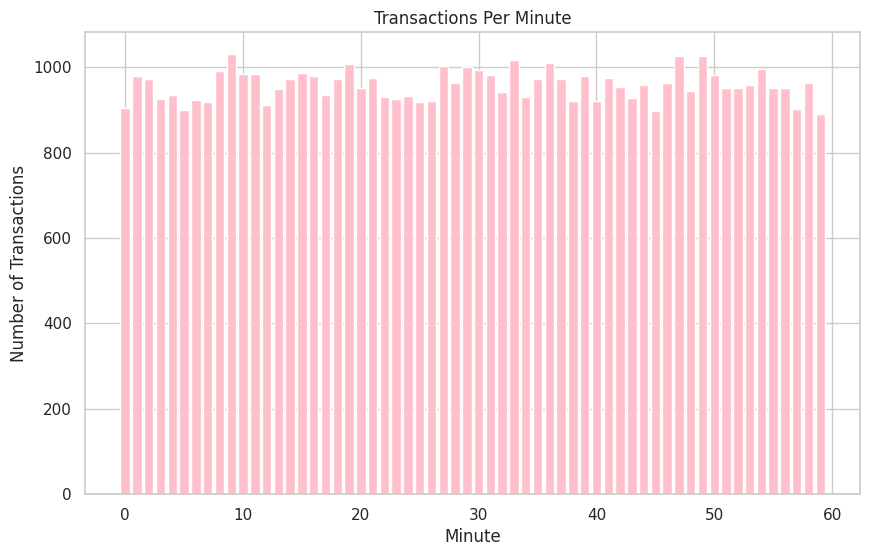

In [ ]:
from pyspark.sql.functions import minute, count
import matplotlib.pyplot as plt


minute_counts = raw_df.withColumn("Minute", minute("TransactionStartTime")) \
    .groupBy("Minute").agg(count("*").alias("Transactions")) \
    .orderBy("Minute")


minute_counts_pd = minute_counts.toPandas()

# generating the plot
plt.figure(figsize=(10, 6))
plt.bar(minute_counts_pd["Minute"], minute_counts_pd["Transactions"], color='pink')

# Set labels and title
plt.xlabel("Minute")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Minute")

# Show the plot
plt.show()


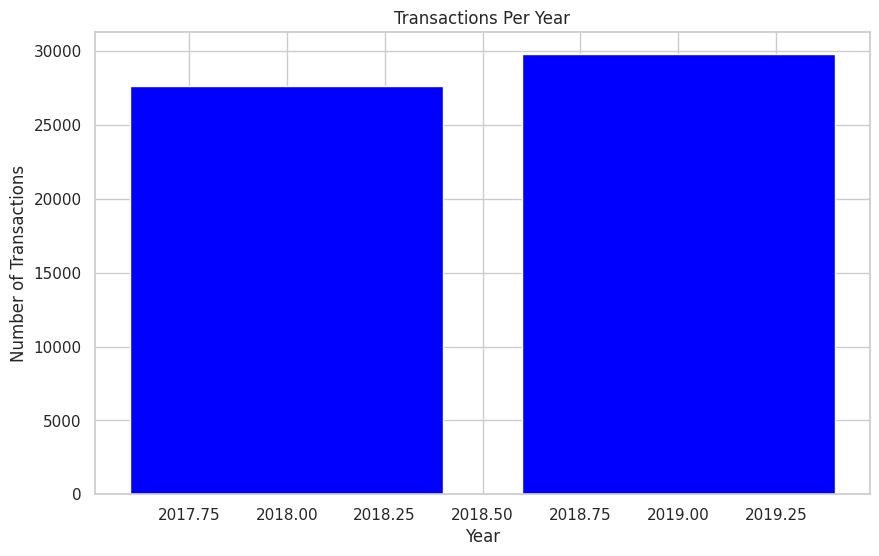

In [ ]:
from pyspark.sql.functions import year, count
import matplotlib.pyplot as plt


year_counts = raw_df.withColumn("Year", year("TransactionStartTime")) \
    .groupBy("Year").agg(count("*").alias("Transactions")) \
    .orderBy("Year")

# Convert year_counts to Pandas DataFrame for plotting
year_counts_pd = year_counts.toPandas()


plt.figure(figsize=(10, 6))
plt.bar(year_counts_pd["Year"], year_counts_pd["Transactions"], color='blue')


plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Year")

# depict the plot
plt.show()



### Till now we concentrated on data analysis generally, what  about the fraud transactions data analysis, where they are occurring, let's see that from now and see how different they are from normal transactions

## 4.4 Analysis of fraud transactions with in debit data


In [ ]:
from pyspark.sql import functions as F


fraud_transactions = raw_df.filter(F.col("FraudResult") == 1)
non_fraud_transactions = raw_df.filter(F.col("FraudResult") == 0)


### - Which batch id transactions are fraud ?

In [ ]:
from pyspark.sql import functions as F

# Assuming 'BatchId' is a column in the fraud_transactions PySpark DataFrame
fraud_batch_id_counts = fraud_transactions.groupBy("BatchId").count().orderBy("count", ascending=False)

# Retrieve the index values (BatchIds) as a list
fraud_batch_ids = [row.BatchId for row in fraud_batch_id_counts.collect()]
fraud_batch_ids

['BatchId_126656',
 'BatchId_66926',
 'BatchId_68081',
 'BatchId_7585',
 'BatchId_56782',
 'BatchId_40160',
 'BatchId_125211',
 'BatchId_32834',
 'BatchId_8060',
 'BatchId_47100',
 'BatchId_16630',
 'BatchId_113718',
 'BatchId_61744',
 'BatchId_17987',
 'BatchId_51205',
 'BatchId_88339',
 'BatchId_12040',
 'BatchId_62465',
 'BatchId_22016',
 'BatchId_21469',
 'BatchId_34263',
 'BatchId_110120',
 'BatchId_52403',
 'BatchId_30449',
 'BatchId_108820',
 'BatchId_93685',
 'BatchId_129124',
 'BatchId_63627',
 'BatchId_30883',
 'BatchId_51633',
 'BatchId_22742',
 'BatchId_63757',
 'BatchId_2365',
 'BatchId_55743',
 'BatchId_47911',
 'BatchId_80911',
 'BatchId_86823',
 'BatchId_23974',
 'BatchId_32463',
 'BatchId_117332',
 'BatchId_77828',
 'BatchId_71337',
 'BatchId_117728',
 'BatchId_48073',
 'BatchId_89498',
 'BatchId_87400',
 'BatchId_11229',
 'BatchId_110983',
 'BatchId_62751',
 'BatchId_25962',
 'BatchId_45675',
 'BatchId_127498',
 'BatchId_46576',
 'BatchId_68474',
 'BatchId_107825',
 '

#### Conclusion, Fraud is not related to any batch, specifically, what about normal behaviour, if the same batch has non-fraud transactions

In [ ]:
from pyspark.sql import functions as F


specific_batch_id = 'BatchId_126656'

non_fraud_specific_batch = non_fraud_transactions.filter(F.col("BatchId") == specific_batch_id)
non_fraud_specific_batch.show()

+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+----+-----+
|TransactionId|BatchId|AccountId|SubscriptionId|CustomerId|CurrencyCode|CountryCode|ProviderId|ProductId|ProductCategory|ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+----+-----+
+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+----+-----+



In [ ]:
from pyspark.sql import functions as F


specific_batch_id = 'BatchId_133354'

non_fraud_specific_batch = non_fraud_transactions.filter(F.col("BatchId") == specific_batch_id)
non_fraud_specific_batch.show()

+-------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|      TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+-------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|TransactionId_93915|BatchId_133354|AccountId_1240|SubscriptionId_4672|CustomerId_1602|         UGX|        256|ProviderId_3|ProductId_15|financial_services|ChannelId_3|2000000.0|2000000| 2019-01-28 21:09:43|              2|          0|  21|    1|
+-------

In [ ]:
from pyspark.sql import functions as F


specific_batch_id = 'BatchId_19378'

non_fraud_specific_batch = non_fraud_transactions.filter(F.col("BatchId") == specific_batch_id)
non_fraud_specific_batch.show()

+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+----+-----+
|TransactionId|BatchId|AccountId|SubscriptionId|CustomerId|CurrencyCode|CountryCode|ProviderId|ProductId|ProductCategory|ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+----+-----+
+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+----+-----+




#### Observation:-

1. Some Batch transaction numbers are present in both fraud and nonfraud transactions
2. A complete batch has entirely fraud transactions can happen since some transactions come in the message queue and batch process happen
3. We cannot infer anything from this

### Major updates:- Can ignore batchID and TransactionID

### -  Which Account ID's transactions are fraud ?

In [ ]:
from pyspark.sql import functions as F


account_id_counts = fraud_transactions.groupBy("AccountId").agg(F.count("*").alias("Count")).orderBy(F.desc("Count"))

# Show the value counts
account_id_counts.show()


+--------------+-----+
|     AccountId|Count|
+--------------+-----+
| AccountId_572|   31|
|AccountId_4421|   22|
|AccountId_1609|   14|
|AccountId_4003|   12|
|AccountId_1909|    8|
|AccountId_4590|    7|
|AccountId_1873|    7|
|AccountId_2656|    7|
|AccountId_4687|    7|
|AccountId_3337|    6|
|AccountId_1178|    6|
|AccountId_1959|    5|
| AccountId_523|    4|
| AccountId_953|    3|
|AccountId_2366|    3|
|AccountId_3832|    3|
|AccountId_1825|    2|
|AccountId_4465|    2|
|AccountId_1488|    2|
|AccountId_3943|    2|
+--------------+-----+
only showing top 20 rows



In [ ]:
#### Observation:-

#### Can see that few account Id's are having fraud transactions, What about normal behaviour for these account ID's

from pyspark.sql import functions as F


account_id_counts = non_fraud_transactions.groupBy("AccountId").agg(F.count("*").alias("Count")).orderBy(F.desc("Count"))

# Show the value counts
account_id_counts.show()


+--------------+-----+
|     AccountId|Count|
+--------------+-----+
|AccountId_3206| 1105|
| AccountId_318| 1070|
|AccountId_3595|  465|
| AccountId_751|  411|
|AccountId_2648|  359|
|AccountId_2314|  356|
|AccountId_1346|  350|
|AccountId_2123|  317|
| AccountId_476|  314|
|AccountId_2659|  310|
|AccountId_1301|  309|
|AccountId_2203|  296|
|AccountId_2990|  294|
|AccountId_1955|  270|
|AccountId_3476|  268|
|AccountId_2783|  266|
|AccountId_3507|  262|
| AccountId_812|  260|
|AccountId_2460|  259|
|AccountId_4383|  252|
+--------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as F


specific_account_id = 'AccountId_572'

non_fraud_specific_account = non_fraud_transactions.filter(F.col("AccountId") == specific_account_id)
non_fraud_specific_account.show()


+--------------------+--------------+-------------+-------------------+--------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|    AccountId|     SubscriptionId|    CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+-------------+-------------------+--------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|TransactionId_135363| BatchId_27780|AccountId_572|SubscriptionId_2950|CustomerId_909|         UGX|        256|ProviderId_5|ProductId_15|financial_services|ChannelId_3|  95000.0|  95000| 2019-01-28 17:28:02|              2|          0|  17|    1|
|Transaction

In [ ]:
from pyspark.sql.functions import col


specific_account_id = 'AccountId_4003'

specific_transactions = non_fraud_transactions.filter(col("AccountId") == specific_account_id)
specific_transactions.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
| TransactionId_88660| BatchId_85283|AccountId_4003|SubscriptionId_3002|CustomerId_4453|         UGX|        256|ProviderId_5|ProductId_15|financial_services|ChannelId_3| 100000.0| 100000| 2018-11-19 15:18:59|              2|          0|  15|   11|
| Tr

#### Observation:-

1. We can see that the account of the person who is a fraud has nonfraud transactions too. So there is something that needs to be looked upon.


### -  Which Subscription ID's transactions are fraud ?

In [ ]:
from pyspark.sql import functions as F


subscription_id_counts = fraud_transactions.groupBy("SubscriptionId").agg(F.count("*").alias("Count")).orderBy(F.desc("Count"))

subscription_id_counts.show()


+-------------------+-----+
|     SubscriptionId|Count|
+-------------------+-----+
|SubscriptionId_2950|   31|
|SubscriptionId_4038|   22|
|SubscriptionId_2872|   14|
|SubscriptionId_3002|   12|
|SubscriptionId_2496|    8|
|SubscriptionId_2964|    7|
| SubscriptionId_666|    7|
|SubscriptionId_2912|    7|
|SubscriptionId_4160|    7|
|SubscriptionId_1252|    6|
|SubscriptionId_2288|    6|
|SubscriptionId_1476|    5|
|SubscriptionId_2315|    4|
|SubscriptionId_4161|    3|
|SubscriptionId_4834|    3|
| SubscriptionId_162|    3|
| SubscriptionId_814|    2|
|SubscriptionId_4080|    2|
|SubscriptionId_1100|    2|
|SubscriptionId_1417|    2|
+-------------------+-----+
only showing top 20 rows



In [ ]:
## what about normal subscription ID's?


In [ ]:
from pyspark.sql import functions as F


subscription_id_counts = non_fraud_transactions.groupBy("SubscriptionId").agg(F.count("*").alias("Count")).orderBy(F.desc("Count"))

# Show the value counts
subscription_id_counts.show()


+-------------------+-----+
|     SubscriptionId|Count|
+-------------------+-----+
|SubscriptionId_1372| 1105|
|SubscriptionId_3087| 1070|
|SubscriptionId_1749|  465|
| SubscriptionId_919|  411|
|SubscriptionId_1311|  359|
|SubscriptionId_4722|  356|
| SubscriptionId_652|  350|
|SubscriptionId_1456|  317|
|SubscriptionId_2272|  314|
|SubscriptionId_3327|  310|
| SubscriptionId_586|  309|
|SubscriptionId_2113|  296|
| SubscriptionId_216|  294|
|SubscriptionId_4208|  270|
|SubscriptionId_2958|  268|
|SubscriptionId_3524|  266|
|SubscriptionId_2644|  262|
|SubscriptionId_3951|  260|
| SubscriptionId_467|  259|
|SubscriptionId_2283|  252|
+-------------------+-----+
only showing top 20 rows



In [ ]:

filtered_fraud_transactions = fraud_transactions.filter(fraud_transactions.SubscriptionId == 'SubscriptionId_2872')

# Show the filtered DataFrame
filtered_fraud_transactions.show()


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+--------+------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|  Amount| Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+--------+------+--------------------+---------------+-----------+----+-----+
|TransactionId_101987| BatchId_64514|AccountId_1609|SubscriptionId_2872|CustomerId_1988|         UGX|        256|ProviderId_3|ProductId_15|financial_services|ChannelId_3|100000.0|100000| 2019-01-23 20:37:59|              2|          1|  20|    1|
| Transactio

In [ ]:

filtered_non_fraud_transactions = non_fraud_transactions[non_fraud_transactions.SubscriptionId == 'SubscriptionId_2872']

# Show the filtered DataFrame
filtered_non_fraud_transactions.show()


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+--------+------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|  Amount| Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+--------+------+--------------------+---------------+-----------+----+-----+
| TransactionId_27148| BatchId_80555|AccountId_1609|SubscriptionId_2872|CustomerId_1988|         UGX|        256|ProviderId_3|ProductId_15|financial_services|ChannelId_3|100000.0|100000| 2019-01-23 20:18:18|              2|          0|  20|    1|
|  Transacti

In [ ]:

filtered_non_fraud_transactions = non_fraud_transactions[non_fraud_transactions.SubscriptionId == 'SubscriptionId_3002']
filtered_non_fraud_transactions.show()



+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
| TransactionId_88660| BatchId_85283|AccountId_4003|SubscriptionId_3002|CustomerId_4453|         UGX|        256|ProviderId_5|ProductId_15|financial_services|ChannelId_3| 100000.0| 100000| 2018-11-19 15:18:59|              2|          0|  15|   11|
| Tr

In [ ]:

filtered_fraud_transactions = fraud_transactions[fraud_transactions.SubscriptionId == 'SubscriptionId_3002']

# Show the filtered DataFrame
filtered_fraud_transactions.show()


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|  TransactionId_2550| BatchId_79762|AccountId_4003|SubscriptionId_3002|CustomerId_4453|         UGX|        256|ProviderId_5|ProductId_15|financial_services|ChannelId_3| 770000.0| 770000| 2018-11-20 12:27:15|              0|          1|  12|   11|
|  T

### observation
1. Sum of fraud transactions mean amount > sum non-fraud amount  mean amount
2. Subscription ID doesn't matter because we don't know what subscriptions they have behind the scenes, Also if it matters then there are 3000+ unique subscriptions for 3000+ unique customers having 3000+ unique account id's. Should explore further, But I believe decision tree can help us in these complex relationships.


### -  Which Customer ID's transactions are fraud ?

In [ ]:
from pyspark.sql import functions as F


customer_id_counts = fraud_transactions.groupBy("CustomerId").agg(F.count("*").alias("Count")).orderBy(F.desc("Count"))

# Show the value counts
customer_id_counts.show()


+---------------+-----+
|     CustomerId|Count|
+---------------+-----+
| CustomerId_909|   31|
|CustomerId_4878|   22|
|CustomerId_1988|   14|
|CustomerId_4453|   12|
|CustomerId_2303|    8|
|CustomerId_2266|    7|
|CustomerId_5054|    7|
|CustomerId_5155|    7|
|CustomerId_3075|    7|
|CustomerId_3768|    6|
|CustomerId_1535|    6|
|CustomerId_2353|    5|
| CustomerId_856|    4|
|CustomerId_1302|    3|
|CustomerId_4275|    3|
|CustomerId_4391|    2|
|CustomerId_1858|    2|
|CustomerId_2216|    2|
|CustomerId_7414|    2|
|CustomerId_4925|    2|
+---------------+-----+
only showing top 20 rows



In [ ]:
### Is this normal behavior?


In [ ]:

filtered_fraud_transactions = fraud_transactions.filter(fraud_transactions.CustomerId == 'CustomerId_909')

# Show the filtered DataFrame
filtered_fraud_transactions.show()


+--------------------+--------------+-------------+-------------------+--------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|    AccountId|     SubscriptionId|    CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+-------------+-------------------+--------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|TransactionId_103109| BatchId_90376|AccountId_572|SubscriptionId_2950|CustomerId_909|         UGX|        256|ProviderId_5|ProductId_15|financial_services|ChannelId_3|1900000.0|1900000| 2019-01-28 18:28:42|              2|          1|  18|    1|
| Transactio

In [ ]:
filtered_non_fraud_transactions = non_fraud_transactions.filter(non_fraud_transactions.CustomerId == 'CustomerId_909')

# Show the filtered DataFrame
filtered_non_fraud_transactions.show()

+--------------------+--------------+-------------+-------------------+--------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|    AccountId|     SubscriptionId|    CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+-------------+-------------------+--------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|TransactionId_135363| BatchId_27780|AccountId_572|SubscriptionId_2950|CustomerId_909|         UGX|        256|ProviderId_5|ProductId_15|financial_services|ChannelId_3|  95000.0|  95000| 2019-01-28 17:28:02|              2|          0|  17|    1|
|Transaction

### Observation
1. Seems Customer Id is also not an issue, because some customers having non fraud transactions are also having fraud transactions and reverse of them is also true.

2. Also, can we form a feature to see if customer has made fraud earlier, or no of frauds per customer/account. This might help us solve above point problem.



## IGNORING CURRENCY CODE AND COUNTRY CODE AS THEY ARE SINGLE CATEGORY, Our business problem is in Uganda.

### -  Which Provider ID's transactions are fraud ?

In [ ]:
provider_counts = fraud_transactions.groupBy("ProviderId").agg(count("*").alias("Count"))

# Show the counts
provider_counts.show()

+------------+-----+
|  ProviderId|Count|
+------------+-----+
|ProviderId_3|   64|
|ProviderId_5|   64|
|ProviderId_1|   57|
|ProviderId_6|    3|
+------------+-----+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LabelSet


provider_counts = fraud_transactions.groupBy("ProviderId").agg(count("*").alias("Transactions")).orderBy("ProviderId")

# Creating  a Pandas DataFrame from the PySpark DataFrame
provider_df = provider_counts.toPandas()

# Calculate the total for percentage calculations
total_transactions = provider_df['Transactions'].sum()

# Calculate percentages
provider_df['Percentage'] = (provider_df['Transactions'] / total_transactions * 100).round(2)

# Preparing  the ColumnDataSource
source = ColumnDataSource(provider_df)

# Output to notebook
output_notebook()

# Create the figure
p = figure(x_range=provider_df['ProviderId'],
           title="Fraud Transaction Counts by ProviderId",
           toolbar_location=None, tools="")

# Add a hover tool to display ProviderId and transaction count
hover = HoverTool()
hover.tooltips = [("ProviderId", "@ProviderId"), ("Transactions", "@Transactions"), ("Percentage", "@Percentage%")]
p.add_tools(hover)

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='ProviderId', top='Transactions', width=0.9, source=source,
       line_color='white', fill_color='Teal')

# Add percentage labels above each bar
labels = LabelSet(x='ProviderId', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Set axis labels
p.xaxis.axis_label = "ProviderId"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.2  # radians, `math.pi/3` for diagonal

# Show the plot
show(p)


In [ ]:
from pyspark.sql.functions import count



# Count the occurrences of each ProviderId for non-fraud transactions
provider_counts_non_fraud = non_fraud_transactions.groupBy("ProviderId").agg(count("*").alias("Transactions")).orderBy("ProviderId")

# Convert the PySpark DataFrame to a Pandas DataFrame
provider_df_non_fraud = provider_counts_non_fraud.toPandas()

# Calculate the total number of non-fraud transactions
total_transactions_non_fraud = provider_df_non_fraud['Transactions'].sum()

# Calculate percentages for non-fraud transactions
provider_df_non_fraud['Percentage'] = (provider_df_non_fraud['Transactions'] / total_transactions_non_fraud * 100).round(2)

# Prepare the ColumnDataSource
source_non_fraud = ColumnDataSource(provider_df_non_fraud)

output_notebook()

# Create the figure
p_non_fraud = figure(x_range=provider_df_non_fraud['ProviderId'],
                     title="Non-Fraud Transaction Counts by ProviderId",
                     toolbar_location=None, tools="")

# Add a hover tool to display ProviderId, transaction count, and percentage
hover_non_fraud = HoverTool()
hover_non_fraud.tooltips = [("ProviderId", "@ProviderId"),
                            ("Transactions", "@Transactions"),
                            ("Percentage", "@Percentage%")]
p_non_fraud.add_tools(hover_non_fraud)

# Render a vertical bar with top aligned to the count of transactions
p_non_fraud.vbar(x='ProviderId', top='Transactions', width=0.9, source=source_non_fraud,
                 line_color='white', fill_color='LightSkyBlue')

# Add percentage labels above each bar
labels_non_fraud = LabelSet(x='ProviderId', y='Transactions', text='Percentage', source=source_non_fraud,
                            level='glyph', x_offset=-10, y_offset=5,
                            text_font_size="8pt", text_color="black", text_align="center")
p_non_fraud.add_layout(labels_non_fraud)


p_non_fraud.xaxis.axis_label = "ProviderId"
p_non_fraud.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p_non_fraud.xaxis.major_label_orientation = 1.2  # radians, `math.pi/3` for diagonal

show(p_non_fraud)


In [ ]:
## exploring why this provider_3 has fraud transactions
provider_id_to_filter = 'ProviderId_3'

# Filter fraud transactions by the specified ProviderId
fraud_transactions_filtered = fraud_transactions.filter(fraud_transactions['ProviderId'] == provider_id_to_filter)

# Show the filtered transactions
fraud_transactions_filtered.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount|  Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+-------+--------------------+---------------+-----------+----+-----+
| TransactionId_60873| BatchId_93685|AccountId_3832|SubscriptionId_4161|CustomerId_4275|         UGX|        256|ProviderId_3|ProductId_15|financial_services|ChannelId_3| 700000.0| 700000| 2018-11-15 08:04:51|              0|          1|   8|   11|
|  T

In [ ]:
provider_id_to_filter = 'ProviderId_3'

# Filter non-fraud transactions by the specified ProviderId
non_fraud_transactions_filtered = non_fraud_transactions.filter(non_fraud_transactions['ProviderId'] == provider_id_to_filter)

# Show the filtered transactions
non_fraud_transactions_filtered.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+-------+-----+--------------------+---------------+-----------+----+-----+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId| Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|Hour|Month|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+-------+-----+--------------------+---------------+-----------+----+-----+
|TransactionId_104687| BatchId_59433| AccountId_710| SubscriptionId_920|CustomerId_1053|         UGX|        256|ProviderId_3|ProductId_15|financial_services|ChannelId_3| 4000.0| 4000| 2018-11-15 04:47:31|              2|          0|   4|   11|
| TransactionId_8690

### Observation

1. Interesting is that Provider 3 is selling product 15 (visual obs, just by looking above) most of the time apart from other product/products he sells which result in fraud.

2. Can we see similar behavior for other providers?

### -  Which Product ID's transactions are fraud ?

In [ ]:
product_counts = fraud_transactions.groupBy('ProductId').agg(count('*').alias('Count'))

# Show the counts
product_counts.show()

+------------+-----+
|   ProductId|Count|
+------------+-----+
|ProductId_15|  157|
|ProductId_21|    4|
| ProductId_5|    2|
| ProductId_9|    3|
|ProductId_22|    2|
|ProductId_10|    5|
| ProductId_3|    9|
|ProductId_13|    6|
+------------+-----+



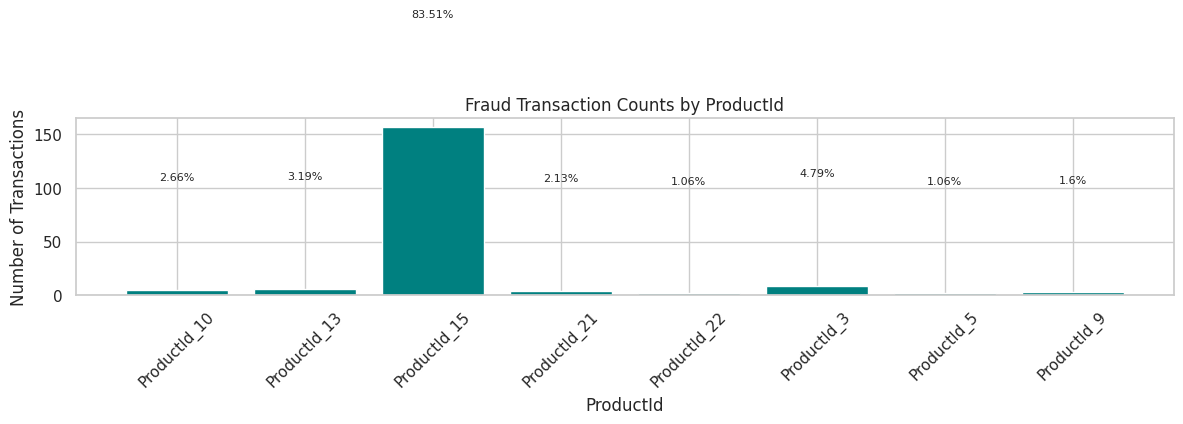

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt



# Group by 'ProductId' and count the occurrences
product_counts = fraud_transactions.groupBy('ProductId').agg(count('*').alias('Transactions'))

# Convert the result to a Pandas DataFrame for plotting
product_df = product_counts.toPandas()

# Calculate percentages
total_transactions = product_df['Transactions'].sum()
product_df['Percentage'] = (product_df['Transactions'] / total_transactions * 100).round(2)

# Sort the DataFrame by 'ProductId'
product_df = product_df.sort_values(by='ProductId')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(product_df['ProductId'], product_df['Transactions'], color='teal')
plt.xlabel('ProductId')
plt.ylabel('Number of Transactions')
plt.title('Fraud Transaction Counts by ProductId')

# Add percentage labels above each bar
for i, percentage in enumerate(product_df['Percentage']):
    plt.text(i, product_df['Transactions'].iloc[i] + 100, f"{percentage}%", ha='center', va='bottom', fontsize=8)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


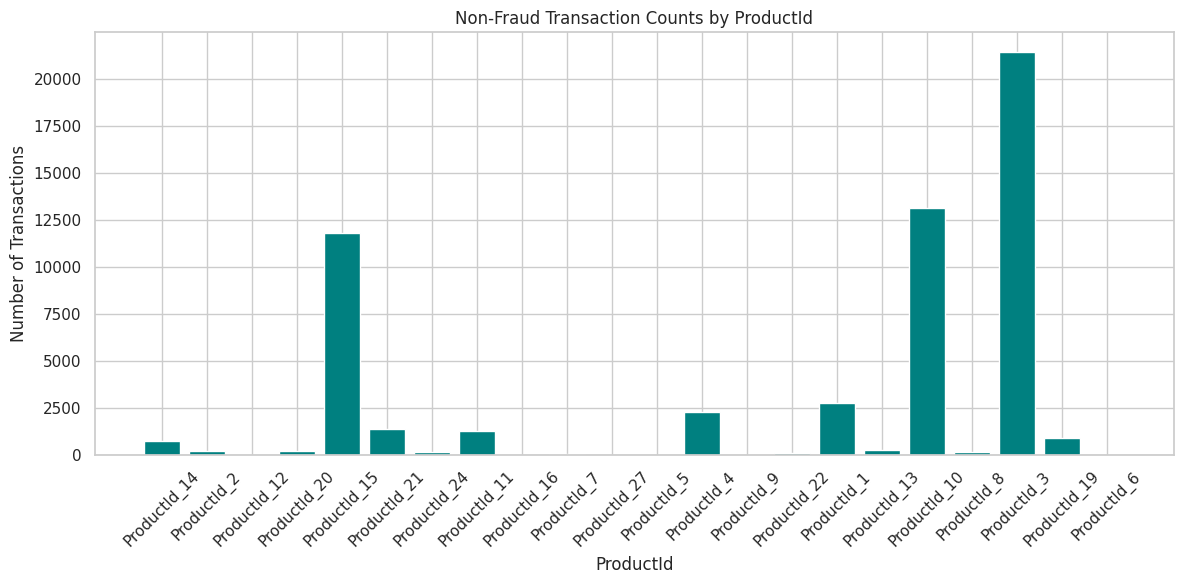

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt



# Group by 'ProductId' and count the occurrences
product_counts = non_fraud_transactions.groupBy('ProductId').agg(count('*').alias('Transactions'))

# Convert the result to a Pandas DataFrame for plotting
product_df = product_counts.toPandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(product_df['ProductId'], product_df['Transactions'], color='teal')
plt.xlabel('ProductId')
plt.ylabel('Number of Transactions')
plt.title('Non-Fraud Transaction Counts by ProductId')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Observations
#### When a customer buys a Product with ids 15,3,10,13,21,9,22,5,6 there can be a possibility of Fraud.
#### While others are not succeptible of being fraud but as per data given these product id's are mostly like to be fraud and this can depend on multiple various factors as well.

### -  Which Product Category transactions are fraud ?

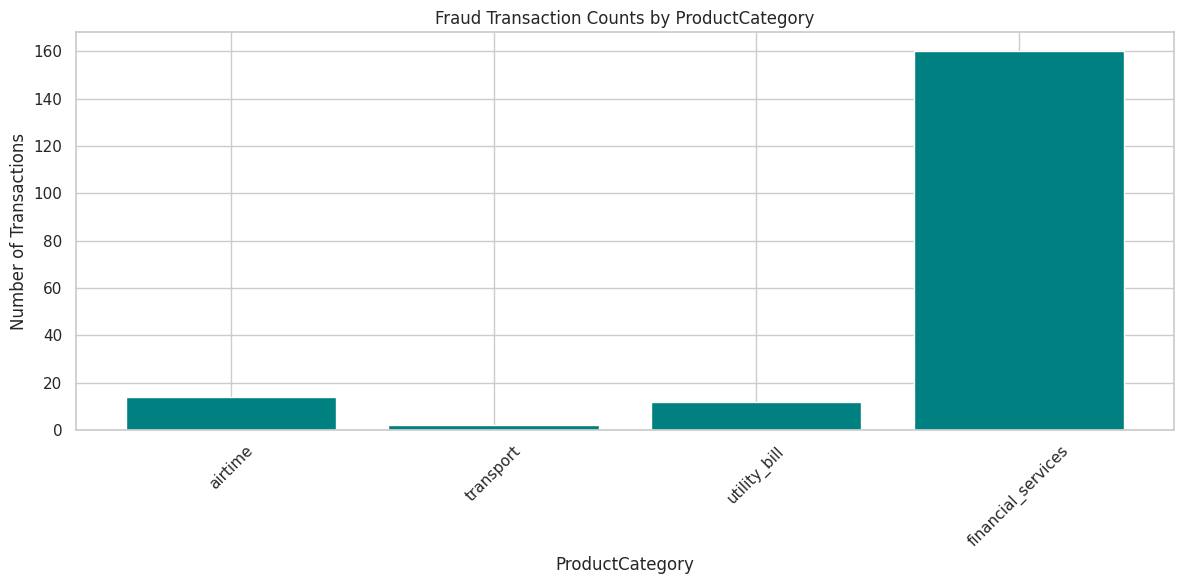

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt



# Group by 'ProductCategory' and count the occurrences
category_counts = fraud_transactions.groupBy('ProductCategory').agg(count('*').alias('Transactions'))

# Convert the result to a Pandas DataFrame for plotting
category_df = category_counts.toPandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(category_df['ProductCategory'], category_df['Transactions'], color='teal')
plt.xlabel('ProductCategory')
plt.ylabel('Number of Transactions')
plt.title('Fraud Transaction Counts by ProductCategory')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [ ]:
# While most of the fraud happens in Financial categories, we can see fraud happening in another line of business as well.
## is this normal?

from pyspark.sql import SparkSession
from pyspark.sql.functions import count



# Group by 'ProductCategory' and count the occurrences
category_counts = non_fraud_transactions.groupBy('ProductCategory').agg(count('*').alias('Transactions'))

# Show the result
category_counts.show()


+------------------+------------+
|   ProductCategory|Transactions|
+------------------+------------+
|            ticket|         216|
|                tv|        1242|
|             other|           2|
|           airtime|       39676|
|         transport|          23|
|      data_bundles|        1533|
|            movies|         173|
|      utility_bill|        1804|
|financial_services|       12616|
+------------------+------------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20



# Group by 'ProductCategory' and count the occurrences
category_counts = non_fraud_transactions.groupBy('ProductCategory').agg(count('*').alias('Transactions'))

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
df_category = category_counts.toPandas()

# Calculate the total for percentage calculations
total_transactions = df_category['Transactions'].sum()

# Calculate percentages
df_category['Percentage'] = (df_category['Transactions'] / total_transactions * 100).round(2)

# Prepare the ColumnDataSource
source = ColumnDataSource(df_category)

# Output to notebook
output_notebook()

# Create the figure with a dynamic width based on the number of categories
plot_width = max(600, len(df_category) * 40)

# Create the figure
p = figure(x_range=df_category['ProductCategory'],
           title="Non-Fraud Transaction Counts by ProductCategory",
           toolbar_location=None, tools="")

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='ProductCategory', top='Transactions', width=0.9, source=source,
       line_color='white',
       fill_color=factor_cmap('ProductCategory', palette=Category20[len(df_category)], factors=df_category['ProductCategory']))

# Add percentage labels above each bar
labels = LabelSet(x='ProductCategory', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol for display
source.data['Percentage'] = [f"{pct}%" for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "ProductCategory"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = "vertical"

# Show the plot
show(p)


## Observation
1. The majority of the fraud categories would be Financial and Airtime.

2. But In the non-fraud section too, the majority is financial and air time line.



### -  Which Channel ID transactions are fraud ?

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.layouts import row
from bokeh.palettes import Spectral4



# Group by 'ChannelId' and count the occurrences for fraudulent transactions
fraud_channel_counts = fraud_transactions.groupBy('ChannelId').agg(count('*').alias('Transactions_fraud'))

# Group by 'ChannelId' and count the occurrences for non-fraudulent transactions
non_fraud_channel_counts = non_fraud_transactions.groupBy('ChannelId').agg(count('*').alias('Transactions_non_fraud'))

# Convert the PySpark DataFrames to Pandas DataFrames for plotting
df_fraud_channel = fraud_channel_counts.toPandas()
df_non_fraud_channel = non_fraud_channel_counts.toPandas()

# Calculate percentages for fraudulent and non-fraudulent transactions
fraud_total = df_fraud_channel['Transactions_fraud'].sum()
non_fraud_total = df_non_fraud_channel['Transactions_non_fraud'].sum()
df_fraud_channel['Percentage_fraud'] = (df_fraud_channel['Transactions_fraud'] / fraud_total * 100).round(2)
df_non_fraud_channel['Percentage_non_fraud'] = (df_non_fraud_channel['Transactions_non_fraud'] / non_fraud_total * 100).round(2)

# Prepare the ColumnDataSources
source_fraud = ColumnDataSource(df_fraud_channel)
source_non_fraud = ColumnDataSource(df_non_fraud_channel)

# Output to notebook
output_notebook()

# Create the figures
p1 = figure(x_range=source_fraud.data['ChannelId'], title="Fraudulent Transactions by ChannelId",
            toolbar_location=None, tools="")
p2 = figure(x_range=source_non_fraud.data['ChannelId'], title="Non-Fraudulent Transactions by ChannelId",
            toolbar_location=None, tools="")

# Render vertical bars for both plots
p1.vbar(x='ChannelId', top='Transactions_fraud', width=0.9, source=source_fraud,
        line_color='white', fill_color=Spectral4[0])
p2.vbar(x='ChannelId', top='Transactions_non_fraud', width=0.9, source=source_non_fraud,
        line_color='white', fill_color=Spectral4[1])

# Add percentage labels above each bar for both plots
labels_fraud = LabelSet(x='ChannelId', y='Transactions_fraud', text='Percentage_fraud', source=source_fraud,
                        level='glyph', x_offset=-10, y_offset=0,
                        text_font_size="8pt", text_color="black", text_align="center")
labels_non_fraud = LabelSet(x='ChannelId', y='Transactions_non_fraud', text='Percentage_non_fraud', source=source_non_fraud,
                            level='glyph', x_offset=-10, y_offset=0,
                            text_font_size="8pt", text_color="black", text_align="center")

p1.add_layout(labels_fraud)
p2.add_layout(labels_non_fraud)

# Set axis labels and titles
p1.xaxis.axis_label = "ChannelId"
p1.yaxis.axis_label = "Number of Transactions"
p2.xaxis.axis_label = "ChannelId"
p2.yaxis.axis_label = "Number of Transactions"

# Convert percentages to string and append the '%' symbol for display
source_fraud.data['Percentage_fraud'] = [f"{pct}%" for pct in source_fraud.data['Percentage_fraud']]
source_non_fraud.data['Percentage_non_fraud'] = [f"{pct}%" for pct in source_non_fraud.data['Percentage_non_fraud']]

# Show the plots side by side
show(row(p1, p2))


### Observation
1. Channel ID 3 has the most fraud transactions happening when compared to little from channel 1

2. If we had known what channel is referring to, i.e. context we could have derived more insights.

3. Also, we could look into, account ID and channel relation, to see if fraud accounts/accounts are using this specific channel for conducting fraud

4. I mean there are many more possibilities of permutations and combinations. Something Decission Tree could model this better.

### -  Amount/value vs transactions are fraud ?

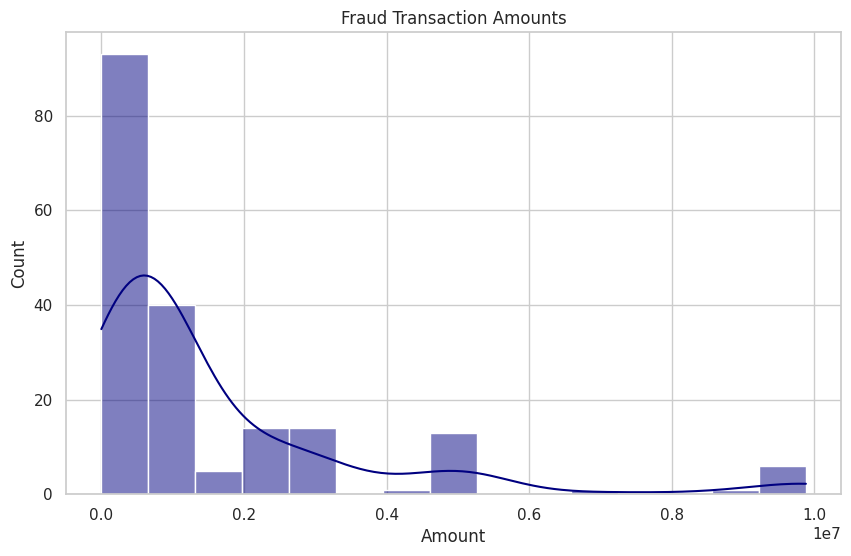

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession



# Extract the 'Amount' column as a list
data = fraud_transactions.select('Amount').rdd.flatMap(lambda x: x).collect()

# Create a histogram plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=15, kde=True, color='navy')
plt.title('Fraud Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')

# Show the Seaborn plot
plt.show()


#### Can we understand mean of fraud transactions and its counter part ?


In [ ]:
from pyspark.sql.functions import mean
# Calculate the mean amount for fraudulent transactions
fraud_mean_amount = fraud_transactions.select(mean('Amount')).collect()[0][0]

# Calculate the mean amount for non-fraudulent transactions
non_fraud_mean_amount = non_fraud_transactions.select(mean('Amount')).collect()[0][0]

fraud_mean_amount, non_fraud_mean_amount

(1588875.4042553192, 8625.087893864013)

### Observation

1. Fraud transaction mean amount is way greater than non-fraud transactions, In general, I believe fraud transactions have a very high amount value. Or It can be only some fraud transactions are high amount-based transactions which is causing the mean to shift. But visually when I see fraud transactions have more amount value.

2. Need to come up with better pricing during modeling like a simple mean model to threshold-based models etc and simple to complex ML models like DT.

### -  What pricing strategy is leading to fraud ?

In [ ]:

from pyspark.sql.functions import count, col

# Assuming you have a DataFrame named 'fraud_transactions'

# Group by 'PricingStrategy' and count the occurrences
fraud_pricing_counts = fraud_transactions.groupBy("PricingStrategy").agg(count("*").alias("Count"))

# Show the counts
fraud_pricing_counts.show()


+---------------+-----+
|PricingStrategy|Count|
+---------------+-----+
|              1|    7|
|              4|    8|
|              2|  138|
|              0|   35|
+---------------+-----+



In [ ]:
### Is this normal?


# Group by 'PricingStrategy' and count the occurrences
non_fraud_pricing_counts = non_fraud_transactions.groupBy("PricingStrategy").agg(count("*").alias("Count"))

# Show the counts
non_fraud_pricing_counts.show()


+---------------+-----+
|PricingStrategy|Count|
+---------------+-----+
|              1| 1860|
|              4| 8142|
|              2|46991|
|              0|  292|
+---------------+-----+



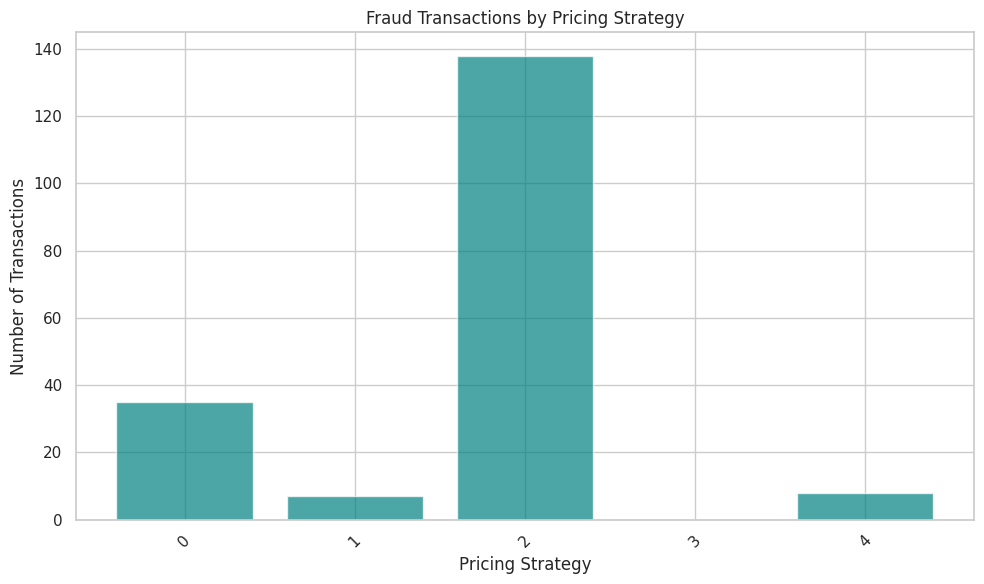

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F



# Group by 'PricingStrategy' and count the occurrences
fraud_pricing_counts = fraud_transactions.groupBy("PricingStrategy").agg(F.count("*").alias("Count")).orderBy("PricingStrategy")

# Convert the DataFrame to a Pandas DataFrame for plotting
df_fraud_pricing = fraud_pricing_counts.toPandas()

# Calculate percentages
total_fraud = df_fraud_pricing['Count'].sum()
df_fraud_pricing['Percentage'] = (df_fraud_pricing['Count'] / total_fraud * 100).round(2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_fraud_pricing['PricingStrategy'], df_fraud_pricing['Count'], color='teal', alpha=0.7)
plt.xlabel("Pricing Strategy")
plt.ylabel("Number of Transactions")
plt.title("Fraud Transactions by Pricing Strategy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


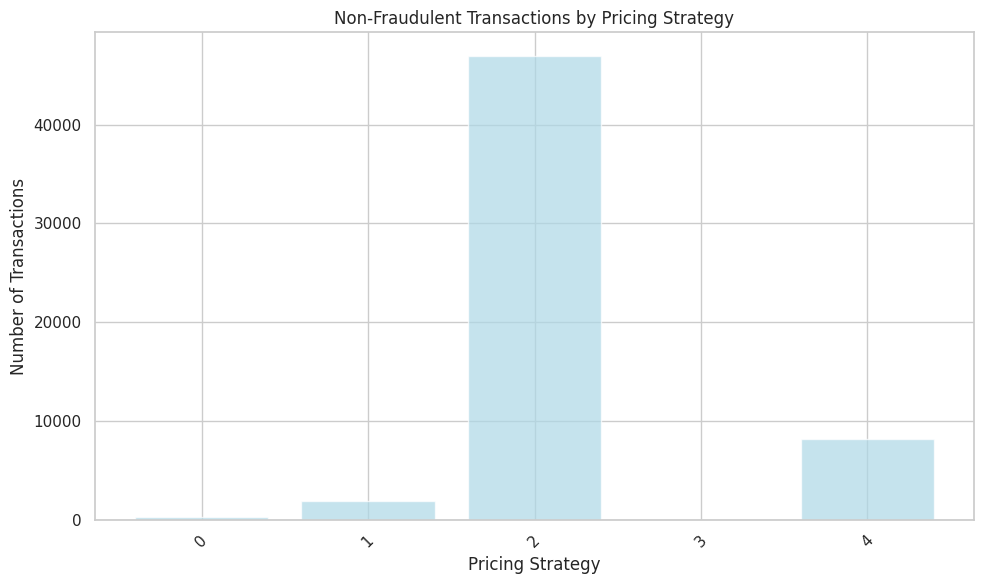

In [ ]:


# Group by 'PricingStrategy' and count the occurrences
non_fraud_pricing_counts = non_fraud_transactions.groupBy("PricingStrategy").agg(F.count("*").alias("Count")).orderBy("PricingStrategy")

# Convert the DataFrame to a Pandas DataFrame for plotting
df_non_fraud_pricing = non_fraud_pricing_counts.toPandas()

# Calculate percentages
total_non_fraud = df_non_fraud_pricing['Count'].sum()
df_non_fraud_pricing['Percentage'] = (df_non_fraud_pricing['Count'] / total_non_fraud * 100).round(2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_non_fraud_pricing['PricingStrategy'], df_non_fraud_pricing['Count'], color='lightblue', alpha=0.7)
plt.xlabel("Pricing Strategy")
plt.ylabel("Number of Transactions")
plt.title("Non-Fraudulent Transactions by Pricing Strategy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Observation

1.  Generally pricing strategy 2 is leading to more fraud transactions than others.




### - Time VS Fraud ? (We only have start time of the transaction)

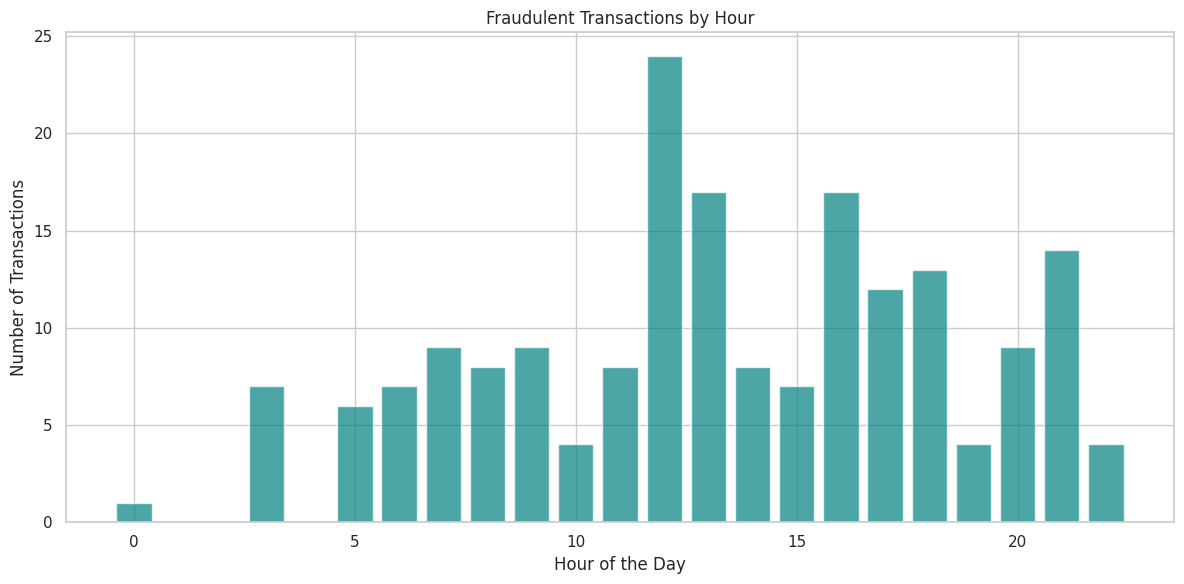

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F



# Extract the hour from the 'TransactionStartTime' column
fraud_transactions = fraud_transactions.withColumn("Hour", F.hour("TransactionStartTime"))

# Group by 'Hour' and count the occurrences
hourly_counts = fraud_transactions.groupBy("Hour").agg(F.count("*").alias("Transactions")).orderBy("Hour")

# Convert the DataFrame to a Pandas DataFrame for plotting
df_hourly = hourly_counts.toPandas()

# Calculate percentages
total_transactions = df_hourly['Transactions'].sum()
df_hourly['Percentage'] = (df_hourly['Transactions'] / total_transactions * 100).round(2)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_hourly['Hour'], df_hourly['Transactions'], color='teal', alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Fraudulent Transactions by Hour")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


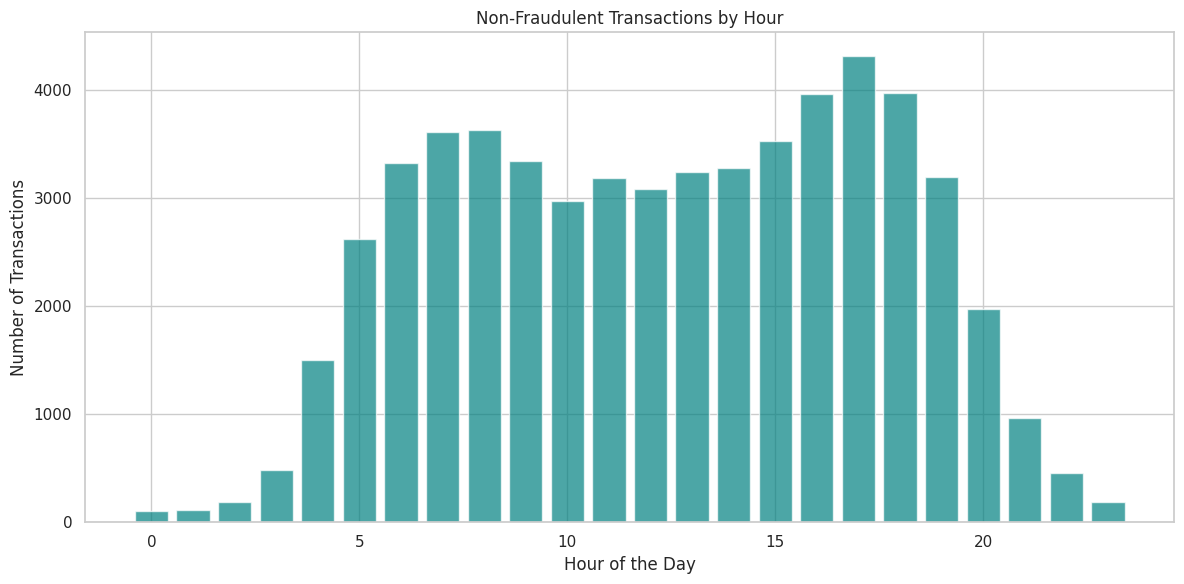

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F



# Extract the hour from the 'TransactionStartTime' column
non_fraud_transactions = non_fraud_transactions.withColumn("Hour", F.hour("TransactionStartTime"))

# Group by 'Hour' and count the occurrences
hourly_counts = non_fraud_transactions.groupBy("Hour").agg(F.count("*").alias("Transactions")).orderBy("Hour")

# Convert the DataFrame to a Pandas DataFrame for plotting
df_hourly = hourly_counts.toPandas()

# Calculate percentages
total_transactions = df_hourly['Transactions'].sum()
df_hourly['Percentage'] = (df_hourly['Transactions'] / total_transactions * 100).round(2)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_hourly['Hour'], df_hourly['Transactions'], color='teal', alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Non-Fraudulent Transactions by Hour")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Observation
1. Most of the fraud are happeing at noon-night period
   
2. Carefel FE needed, like temporal based features per account/customer id transactions


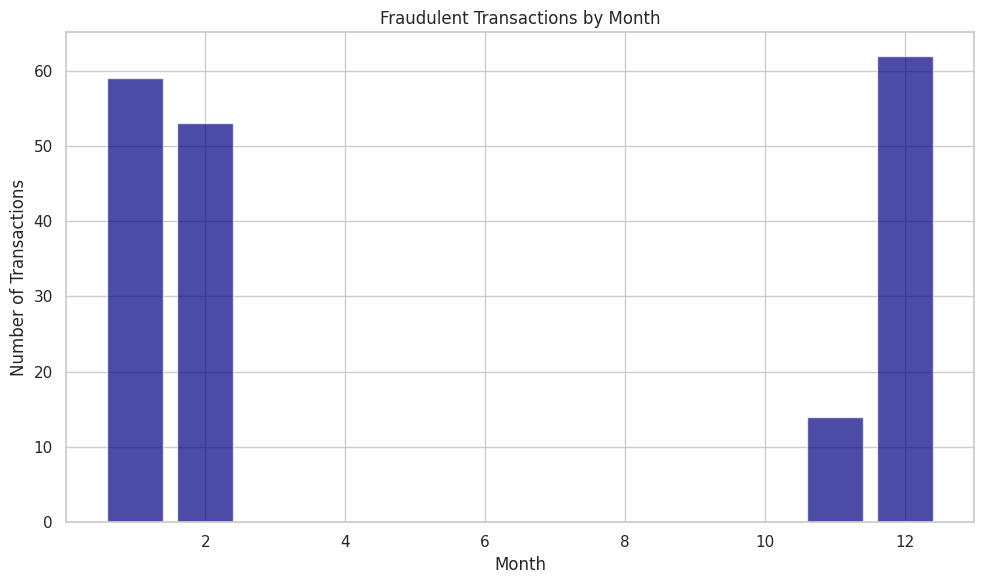

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F



# Extract the month from the 'TransactionStartTime' column
fraud_transactions = fraud_transactions.withColumn("Month", F.month("TransactionStartTime"))

# Group by 'Month' and count the occurrences
monthly_counts = fraud_transactions.groupBy("Month").agg(F.count("*").alias("Transactions")).orderBy("Month")

# Convert the DataFrame to a Pandas DataFrame for plotting
df_monthly = monthly_counts.toPandas()

# Calculate percentages
total_transactions = df_monthly['Transactions'].sum()
df_monthly['Percentage'] = (df_monthly['Transactions'] / total_transactions * 100).round(2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_monthly['Month'], df_monthly['Transactions'], color='navy', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Fraudulent Transactions by Month")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


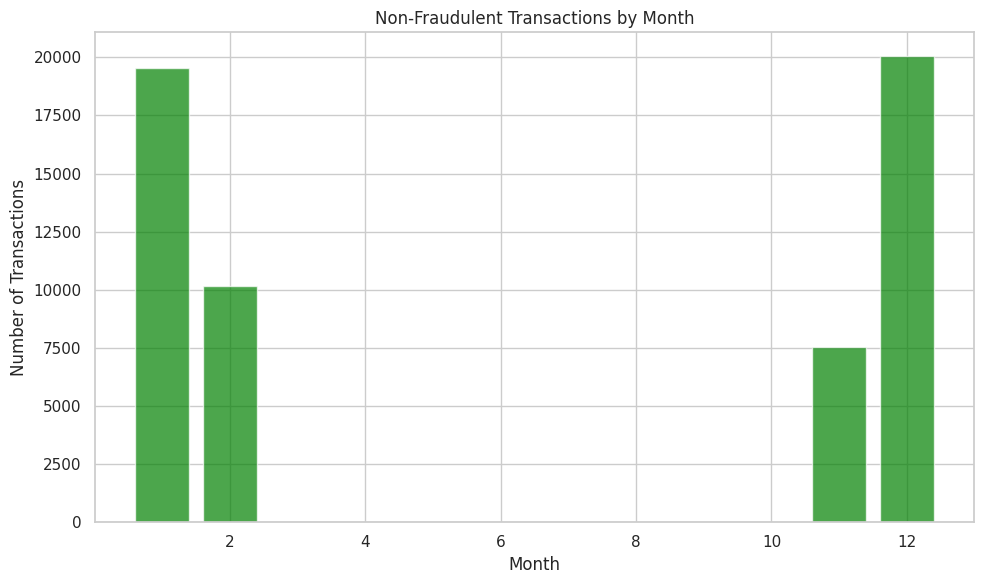

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F



# Extract the month from the 'TransactionStartTime' column
non_fraud_transactions = non_fraud_transactions.withColumn("Month", F.month("TransactionStartTime"))

# Group by 'Month' and count the occurrences
monthly_counts = non_fraud_transactions.groupBy("Month").agg(F.count("*").alias("Transactions")).orderBy("Month")

# Convert the DataFrame to a Pandas DataFrame for plotting
df_monthly = monthly_counts.toPandas()

# Calculate percentages
total_transactions = df_monthly['Transactions'].sum()
df_monthly['Percentage'] = (df_monthly['Transactions'] / total_transactions * 100).round(2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_monthly['Month'], df_monthly['Transactions'], color='green', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Non-Fraudulent Transactions by Month")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Observation
#### weeks, months, days not much info to infer.

# 5. Credit Data Analysis

## 5.1 Exploring Basic stats and dataset

In [ ]:

credits_raw_df.show()


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|   ProductCategory|  ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
| TransactionId_73770| BatchId_15642|AccountId_4841|SubscriptionId_3829|CustomerId_4406|         UGX|        256|ProviderId_4|ProductId_6|financial_services|ChannelId_2| -20.0|   20| 2018-11-15 02:19:08|              2|          0|
| TransactionId_28195| BatchId_38780|AccountId_4841|SubscriptionId_3829|

In [ ]:

num_rows = credits_raw_df.count()
num_columns = len(credits_raw_df.columns)
shape = (num_rows, num_columns)
shape

(38189, 16)

In [ ]:
from pyspark.sql import functions as F


mean_amount = credits_raw_df.agg(F.mean(credits_raw_df['Amount'])).collect()[0][0]




In [ ]:
mean_amount

-3931.86809028778

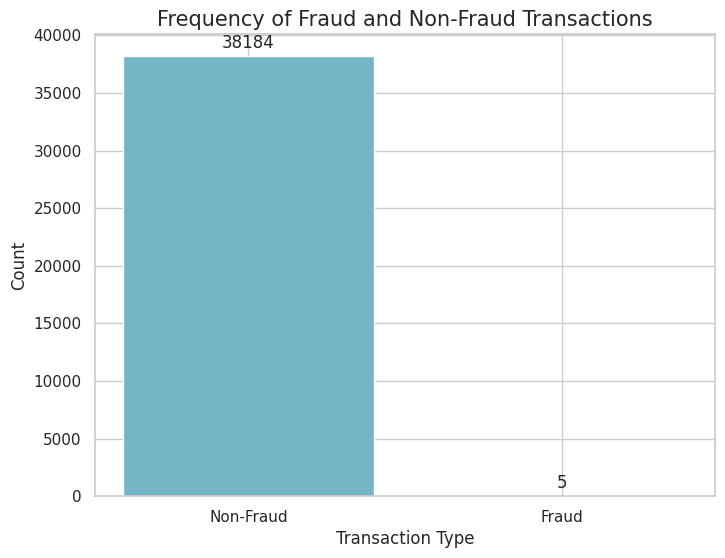

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = credits_raw_df.select("FraudResult").toPandas()

# Calculate the count of 1s (Fraud) and 0s (Non-Fraud)
count_1 = data[data["FraudResult"] == 1].shape[0]
count_0 = data[data["FraudResult"] == 0].shape[0]

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Transaction Type': ['Non-Fraud', 'Fraud'],
    'Count': [count_0, count_1]
})

# Create a color palette
palette = ["#76b5c5", "#ff6b6b"]  # Light blue for Non-Fraud, Red for Fraud

# Create the bar plot
plt.figure(figsize=(8, 6))
barplot = plt.bar(plot_data['Transaction Type'], plot_data['Count'], color=palette)

# Annotate the bars with the count value
for bar in barplot:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Set titles and labels
plt.title('Frequency of Fraud and Non-Fraud Transactions', fontsize=15)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


## Observations on Basic Data Exploration

1. Based on Domain Knowledge and General Scenario, I can remove Transaction_ID Easily.
2. Very big class imbalance issue
3. Mean Amount is -3931.XXX Uganda Dollars
4. 38K rows and 16 columns

### 5.2 Getting to know the frequency of categorical variables

In [ ]:
transaction_id_counts = credits_raw_df.groupBy("TransactionId").agg(count("*").alias("Count"))

# Show the counts
transaction_id_counts.show()

+--------------------+-----+
|       TransactionId|Count|
+--------------------+-----+
| TransactionId_69578|    1|
|TransactionId_121679|    1|
| TransactionId_53948|    1|
| TransactionId_22966|    1|
| TransactionId_84170|    1|
| TransactionId_72797|    1|
| TransactionId_43535|    1|
| TransactionId_98645|    1|
| TransactionId_53188|    1|
| TransactionId_24033|    1|
| TransactionId_56039|    1|
| TransactionId_48792|    1|
| TransactionId_95278|    1|
| TransactionId_93410|    1|
| TransactionId_33485|    1|
| TransactionId_80482|    1|
|TransactionId_129346|    1|
|  TransactionId_6023|    1|
| TransactionId_15588|    1|
| TransactionId_98733|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
batch_id_counts = credits_raw_df.groupBy("BatchId").agg(count("*").alias("Count"))

# Show the counts
batch_id_counts.show()

+--------------+-----+
|       BatchId|Count|
+--------------+-----+
| BatchId_16327|    1|
|BatchId_128466|    1|
| BatchId_63699|    1|
|BatchId_111246|    1|
| BatchId_92688|    1|
| BatchId_37292|    1|
| BatchId_29389|    1|
|BatchId_125312|    1|
| BatchId_23145|    1|
| BatchId_20471|    1|
| BatchId_56979|    1|
|BatchId_109784|    1|
|BatchId_134219|    1|
|  BatchId_3976|    1|
| BatchId_48655|    1|
|BatchId_100577|    1|
| BatchId_27164|    1|
|BatchId_125393|    1|
| BatchId_50639|    1|
|BatchId_133914|    1|
+--------------+-----+
only showing top 20 rows



In [ ]:
account_id_counts = credits_raw_df.groupBy("AccountId").agg(count("*").alias("Count"))

# Show the counts
account_id_counts.show()

+--------------+-----+
|     AccountId|Count|
+--------------+-----+
|AccountId_2420|   28|
|  AccountId_10|  965|
|AccountId_1074|   20|
|AccountId_4249| 4457|
|AccountId_4841|30891|
| AccountId_398|   83|
|AccountId_4840| 1738|
|AccountId_4713|    7|
+--------------+-----+



In [ ]:
subscription_id_counts = credits_raw_df.groupBy("SubscriptionId").agg(count("*").alias("Count"))

# Show the counts
subscription_id_counts.show()

+-------------------+-----+
|     SubscriptionId|Count|
+-------------------+-----+
|SubscriptionId_3829|32629|
|SubscriptionId_3350|   83|
|SubscriptionId_4346|  965|
|SubscriptionId_4429| 4457|
|SubscriptionId_4836|   48|
|SubscriptionId_3637|    7|
+-------------------+-----+



In [ ]:
customer_id_counts = credits_raw_df.groupBy("CustomerId").agg(count("*").alias("Count"))

# Show the counts
customer_id_counts.show()

+---------------+-----+
|     CustomerId|Count|
+---------------+-----+
|CustomerId_3307|   12|
|CustomerId_4665|    2|
|CustomerId_3787|    8|
|CustomerId_5170|    4|
|CustomerId_3224|   21|
|CustomerId_4087|    2|
|CustomerId_7441|    2|
| CustomerId_619|    4|
|CustomerId_2956|    9|
|CustomerId_3123|   25|
| CustomerId_832|    4|
|CustomerId_4846|   38|
|CustomerId_3330|   49|
|CustomerId_3477|    7|
|CustomerId_4181|   20|
|CustomerId_3043|    4|
|CustomerId_2675|   22|
|CustomerId_3897|   12|
|CustomerId_4928|   29|
|CustomerId_3205|   15|
+---------------+-----+
only showing top 20 rows



In [ ]:
provider_id_counts = credits_raw_df.groupBy("ProviderId").agg(count("*").alias("Count"))

# Show the counts
provider_id_counts.show()

+------------+-----+
|  ProviderId|Count|
+------------+-----+
|ProviderId_4|38189|
+------------+-----+



In [ ]:
product_id_counts = credits_raw_df.groupBy("ProductId").agg(count("*").alias("Count"))

# Show the counts
product_id_counts.show()

+------------+-----+
|   ProductId|Count|
+------------+-----+
| ProductId_6|32629|
| ProductId_2|   12|
|ProductId_23|    1|
|ProductId_21|   89|
|ProductId_24|    2|
|ProductId_11|   68|
| ProductId_7|    6|
|ProductId_27|    2|
| ProductId_4|  103|
| ProductId_1|   80|
|ProductId_13|   14|
|ProductId_10| 2226|
| ProductId_8|    5|
| ProductId_3| 2927|
|ProductId_19|   24|
|ProductId_22|    1|
+------------+-----+



In [ ]:
product_category_counts = credits_raw_df.groupBy("ProductCategory").agg(count("*").alias("Count"))

# Show the counts
product_category_counts.show()

+------------------+-----+
|   ProductCategory|Count|
+------------------+-----+
|                tv|   37|
|           airtime| 5337|
|      data_bundles|   80|
|            movies|    2|
|      utility_bill|  104|
|financial_services|32629|
+------------------+-----+



In [ ]:
channel_id_counts = credits_raw_df.groupBy("ChannelId").agg(count("*").alias("Count"))

# Show the counts
channel_id_counts.show()

+-----------+-----+
|  ChannelId|Count|
+-----------+-----+
|ChannelId_5| 1048|
|ChannelId_2|37141|
+-----------+-----+



In [ ]:
pricing_strategy_counts = credits_raw_df.groupBy("PricingStrategy").agg(count("*").alias("Count"))

# Show the counts
pricing_strategy_counts.show()

+---------------+-----+
|PricingStrategy|Count|
+---------------+-----+
|              4| 5412|
|              2|32719|
|              0|   58|
+---------------+-----+



In [ ]:
fraud_result_counts = credits_raw_df.groupBy("FraudResult").agg(count("*").alias("Count"))

# Show the counts
fraud_result_counts.show()

+-----------+-----+
|FraudResult|Count|
+-----------+-----+
|          1|    5|
|          0|38184|
+-----------+-----+



### Observations for Frequencies:-

1. Transactions are unique.
2. There are groups of batches that process different transactions per time.
3. There are some accounts that have more transactions, probably they are active users of the platform. or Account sharing is happening?
4. There are some Subscriptions that have more transactions, probably they are active users of the platform, Same like Acoounts, Like accounts and subscriptions are the same.
5. Some Customers are heavy users on the platform as they are having more transactions
6. There is only One currency Code/Country Code.
7. There are 1 provider for Items, that people are buying performing transactions
8. There are few products that people get the most, 6,3,10,4, 21, 11, 1, 19
9. There are two product categories that dominated the customer interests Financial Services and Airtime
10. There are two channels that the customer used for the transactions- Channels 2,5
11. There is a pricing strategy that was applied to most of the customers on the platform
12. The highly dataset is imbalanced

## 5.3 Analysing time

In [ ]:
from pyspark.sql.functions import col, to_timestamp
credits_raw_df = credits_raw_df.withColumn('TransactionStartTime', to_timestamp(col('TransactionStartTime')))

# Show the updated DataFrame
credits_raw_df.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|   ProductCategory|  ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
| TransactionId_73770| BatchId_15642|AccountId_4841|SubscriptionId_3829|CustomerId_4406|         UGX|        256|ProviderId_4|ProductId_6|financial_services|ChannelId_2| -20.0|   20| 2018-11-15 02:19:08|              2|          0|
| TransactionId_28195| BatchId_38780|AccountId_4841|SubscriptionId_3829|

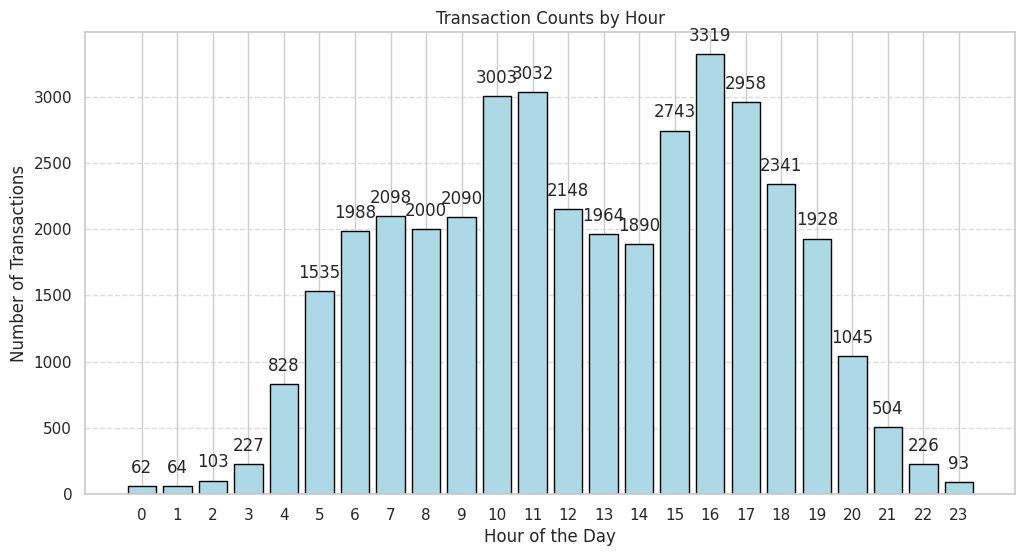

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour
import matplotlib.pyplot as plt



# Extract the hour from TransactionStartTime
hour_df = credits_raw_df.withColumn('Hour', hour('TransactionStartTime'))

# Calculate hourly counts
hour_counts = hour_df.groupBy('Hour').count().orderBy('Hour').toPandas()

# Calculate the total for percentage calculations
total_transactions = hour_counts['count'].sum()

# Calculate percentages
hour_counts['Percentage'] = (hour_counts['count'] / total_transactions * 100).round(2)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(hour_counts['Hour'], hour_counts['count'], color='lightblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by Hour')
plt.xticks(hour_counts['Hour'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the count value
for i, count in enumerate(hour_counts['count']):
    plt.text(hour_counts['Hour'][i], count + 100, str(count), ha='center')

# Show the plot
plt.show()


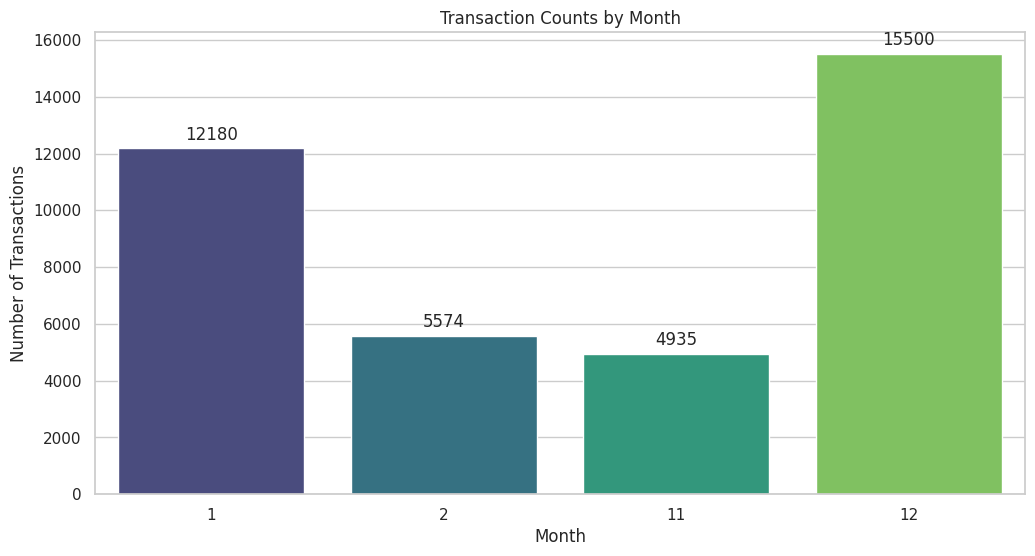

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import month
import pandas as pd


# Extract the month from TransactionStartTime
month_df = credits_raw_df.withColumn('Month', month('TransactionStartTime'))

# Calculate monthly counts
month_counts = month_df.groupBy('Month').count().orderBy('Month').toPandas()

# Calculate the total for percentage calculations
total_transactions = month_counts['count'].sum()

# Calculate percentages
month_counts['Percentage'] = (month_counts['count'] / total_transactions * 100).round(2)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Month', y='count', data=month_counts, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by Month')

# Annotate the bars with the count value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

# Show the plot
plt.show()


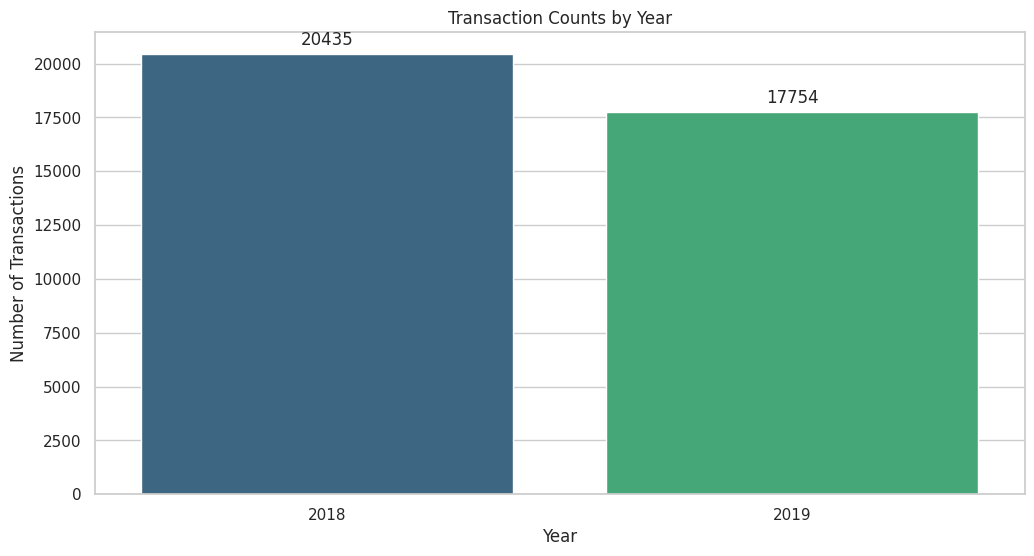

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import year
import pandas as pd


# Extract the year from TransactionStartTime
year_df = credits_raw_df.withColumn('Year', year('TransactionStartTime'))

# Calculate yearly counts
year_counts = year_df.groupBy('Year').count().orderBy('Year').toPandas()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Year', y='count', data=year_counts, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by Year')

# Annotate the bars with the count value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

# Show the plot
plt.show()


## Observations from Time

1. December and January have the most credit transactions probably due to Christmas and new year, Porbably people doesn't like the product once they bought or cancelled their travel plans. Etc.

### Till now we concentrated on data analysis generally, what  about the fraud transactions data analysis, where they are occurring, let's see that from now and see how different they are from normal transactions

## 5.4 Analysis of fraud transactions with in credit data


In [ ]:
# Subset for fraud transactions
fraud_transactions = credits_raw_df.filter(credits_raw_df['FraudResult'] == 1)

# Subset for non-fraud transactions
non_fraud_transactions = credits_raw_df.filter(credits_raw_df['FraudResult'] == 0)

### - Which batch id transactions are fraud ?

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col
batch_id_counts = fraud_transactions.groupBy("BatchId").agg(count("*").alias("Count"))

# Get the unique values of 'BatchId' and collect them as a list
unique_batch_ids = batch_id_counts.select("BatchId").rdd.flatMap(lambda x: x).collect()

# Show the unique BatchIds
unique_batch_ids

['BatchId_76447',
 'BatchId_127642',
 'BatchId_101919',
 'BatchId_62457',
 'BatchId_93368']

#### Conclusion, Fraud is not related to any batch, specifically, what about normal behaviour, if the same batch has non-fraud transactions

In [ ]:
filtered_non_fraud_transactions = non_fraud_transactions.filter(non_fraud_transactions['BatchId'] == 'BatchId_76447')

# Show the resulting DataFrame
filtered_non_fraud_transactions.show()

+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+
|TransactionId|BatchId|AccountId|SubscriptionId|CustomerId|CurrencyCode|CountryCode|ProviderId|ProductId|ProductCategory|ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+
+-------------+-------+---------+--------------+----------+------------+-----------+----------+---------+---------------+---------+------+-----+--------------------+---------------+-----------+




#### Observation:-

1. A complete batch has entirely fraud transactions can happen since some transactions come in the message queue and batch process happen
2. We cannot infer anything from this

### Major updates:- Can ignore batchID and TransactionID

### - Which Account ID's transactions are fraud ?

In [ ]:
# Calculate the value counts of the 'AccountId' column
account_counts = fraud_transactions.groupBy("AccountId").agg(count("*").alias("Count"))

# Show the resulting DataFrame
account_counts.show()

+--------------+-----+
|     AccountId|Count|
+--------------+-----+
|AccountId_4249|    4|
|AccountId_4841|    1|
+--------------+-----+



In [ ]:
#### Observation:-

#### Can see that few account Id's are having fraud transactions, What about normal behaviour for these account ID's

account_counts = non_fraud_transactions.groupBy("AccountId").agg(count("*").alias("Count"))

# Show the resulting DataFrame
account_counts.show()

+--------------+-----+
|     AccountId|Count|
+--------------+-----+
|AccountId_2420|   28|
|  AccountId_10|  965|
|AccountId_1074|   20|
|AccountId_4249| 4453|
|AccountId_4841|30890|
| AccountId_398|   83|
|AccountId_4840| 1738|
|AccountId_4713|    7|
+--------------+-----+



In [ ]:
filtered_transactions = non_fraud_transactions.filter(non_fraud_transactions['AccountId'] == 'AccountId_4841')

# Show the resulting DataFrame
filtered_transactions.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|   ProductCategory|  ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
| TransactionId_73770| BatchId_15642|AccountId_4841|SubscriptionId_3829|CustomerId_4406|         UGX|        256|ProviderId_4|ProductId_6|financial_services|ChannelId_2| -20.0|   20| 2018-11-15 02:19:08|              2|          0|
| TransactionId_28195| BatchId_38780|AccountId_4841|SubscriptionId_3829|

In [ ]:
filtered_transactions = fraud_transactions.filter(fraud_transactions['AccountId'] == 'AccountId_4841')

# Show the resulting DataFrame
filtered_transactions.show()

+-------------------+-------------+--------------+-------------------+--------------+------------+-----------+------------+-----------+------------------+-----------+-------+-----+--------------------+---------------+-----------+
|      TransactionId|      BatchId|     AccountId|     SubscriptionId|    CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|   ProductCategory|  ChannelId| Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+-------------------+-------------+--------------+-------------------+--------------+------------+-----------+------------+-----------+------------------+-----------+-------+-----+--------------------+---------------+-----------+
|TransactionId_71725|BatchId_62457|AccountId_4841|SubscriptionId_3829|CustomerId_865|         UGX|        256|ProviderId_4|ProductId_6|financial_services|ChannelId_2|-1005.0| 1005| 2019-01-23 09:15:37|              2|          1|
+-------------------+-------------+--------------+-------------------+----------

#### Observation:-

1. We can see that the account of the person who is a fraud has nonfraud transactions too. So there is something that needs to be looked upon.


### - Which Subscription ID's transactions are fraud ?

In [ ]:
# Group by 'SubscriptionId' and count the occurrences of each value
subscription_id_counts = fraud_transactions.groupBy('SubscriptionId').agg(count('*').alias('Count'))

# Show the resulting DataFrame
subscription_id_counts.show()

+-------------------+-----+
|     SubscriptionId|Count|
+-------------------+-----+
|SubscriptionId_4429|    4|
|SubscriptionId_3829|    1|
+-------------------+-----+



In [ ]:
## what about normal subscription ID's?


In [ ]:
subscription_id_counts = non_fraud_transactions.groupBy('SubscriptionId').agg(count('*').alias('Count'))

# Show the resulting DataFrame
subscription_id_counts.show()

+-------------------+-----+
|     SubscriptionId|Count|
+-------------------+-----+
|SubscriptionId_3829|32628|
|SubscriptionId_3350|   83|
|SubscriptionId_4346|  965|
|SubscriptionId_4429| 4453|
|SubscriptionId_4836|   48|
|SubscriptionId_3637|    7|
+-------------------+-----+



In [ ]:
# Filter the DataFrame to include only rows with 'SubscriptionId' equal to 'SubscriptionId_4429'
filtered_fraud_transactions = fraud_transactions.filter(fraud_transactions.SubscriptionId == 'SubscriptionId_4429')

# Show the resulting DataFrame
filtered_fraud_transactions.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+---------------+-----------+---------+------+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|ProductCategory|  ChannelId|   Amount| Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+---------------+-----------+---------+------+--------------------+---------------+-----------+
| TransactionId_56954| BatchId_76447|AccountId_4249|SubscriptionId_4429|CustomerId_7339|         UGX|        256|ProviderId_4| ProductId_3|        airtime|ChannelId_2|-900000.0|900000| 2019-01-10 15:48:59|              4|          1|
| TransactionId_73797|BatchId_127642|AccountId_4249|Subscription

In [ ]:
filtered_non_fraud_transactions = non_fraud_transactions.filter(non_fraud_transactions.SubscriptionId == 'SubscriptionId_4429')

# Show the resulting DataFrame
filtered_non_fraud_transactions.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+---------------+-----------+--------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|ProductCategory|  ChannelId|  Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+---------------+-----------+--------+-----+--------------------+---------------+-----------+
| TransactionId_74975|BatchId_100500|AccountId_4249|SubscriptionId_4429|CustomerId_7476|         UGX|        256|ProviderId_4|ProductId_10|        airtime|ChannelId_2| -1000.0| 1000| 2018-11-15 07:01:52|              4|          0|
| TransactionId_15240|BatchId_138225|AccountId_4249|SubscriptionId_4429|

### observation
1. Sum of fraud transactions mean amount > sum non-fraud amount  mean amount , just by some observation
2. Subscription ID doesn't matter because we don't know what subscriptions they have behind the scenes, Also if it matters then there are 3000+ unique subscriptions for 3000+ unique customers having 3000+ unique account id's. Should explore further, But I believe decision tree can help us in these complex relationships.


### - Which Customer ID's transactions are fraud ?

In [ ]:
customer_counts = fraud_transactions.groupBy("CustomerId").agg(count("*").alias("TransactionCount"))

# Show the resulting DataFrame
customer_counts.show()

+---------------+----------------+
|     CustomerId|TransactionCount|
+---------------+----------------+
|CustomerId_7339|               2|
|CustomerId_7401|               1|
|CustomerId_7429|               1|
| CustomerId_865|               1|
+---------------+----------------+



In [ ]:
### Is this normal behavior?
customer_counts = non_fraud_transactions.groupBy("CustomerId").agg(count("*").alias("TransactionCount"))

# Show the resulting DataFrame
customer_counts.show()

+---------------+----------------+
|     CustomerId|TransactionCount|
+---------------+----------------+
|CustomerId_3307|              12|
|CustomerId_4665|               2|
|CustomerId_3787|               8|
|CustomerId_5170|               4|
|CustomerId_3224|              21|
|CustomerId_4087|               2|
|CustomerId_7441|               2|
| CustomerId_619|               4|
|CustomerId_2956|               9|
|CustomerId_3123|              25|
| CustomerId_832|               4|
|CustomerId_4846|              38|
|CustomerId_3330|              49|
|CustomerId_3477|               7|
|CustomerId_4181|              20|
|CustomerId_3043|               4|
|CustomerId_2675|              22|
|CustomerId_3897|              12|
|CustomerId_4928|              29|
|CustomerId_3205|              15|
+---------------+----------------+
only showing top 20 rows



In [ ]:
customer_id_to_filter = 'CustomerId_7429'

# Filter the DataFrame to get transactions for the specified CustomerId
filtered_transactions = fraud_transactions.filter(fraud_transactions.CustomerId == customer_id_to_filter)

# Show the resulting DataFrame
filtered_transactions.show()

+--------------------+-------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+---------------+-----------+---------+------+--------------------+---------------+-----------+
|       TransactionId|      BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|ProductCategory|  ChannelId|   Amount| Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+-------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+---------------+-----------+---------+------+--------------------+---------------+-----------+
|TransactionId_126320|BatchId_93368|AccountId_4249|SubscriptionId_4429|CustomerId_7429|         UGX|        256|ProviderId_4|ProductId_3|        airtime|ChannelId_2|-500000.0|500000| 2019-01-15 11:09:57|              0|          1|
+--------------------+-------------+--------------+-------------------+-

In [ ]:
customer_id_to_filter = 'CustomerId_7429'
filtered_transactions = non_fraud_transactions.filter(non_fraud_transactions.CustomerId == customer_id_to_filter)

# Show the resulting DataFrame
filtered_transactions.show()

+-------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+---------------+-----------+--------+-----+--------------------+---------------+-----------+
|      TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|ProductCategory|  ChannelId|  Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+-------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+---------------+-----------+--------+-----+--------------------+---------------+-----------+
|TransactionId_54257|BatchId_137896|AccountId_4249|SubscriptionId_4429|CustomerId_7429|         UGX|        256|ProviderId_4|ProductId_3|        airtime|ChannelId_2|-20000.0|20000| 2019-01-15 23:50:48|              4|          0|
+-------------------+--------------+--------------+-------------------+---------

### Observation
1. Seems Customer Id is also not an issue, because some customers having non fraud transactions are also having fraud transactions and reverse of them is also true.

2. Also, can we form a feature to see if customer has made fraud earlier, or no of frauds per customer/account. This might help us solve above point problem.



## IGNORING CURRENCY CODE AND COUNTRY CODE AS THEY ARE SINGLE CATEGORY, Our business problem is in Uganda.

### - Which Provider ID's transactions are fraud ?

In [ ]:
provider_id_counts = fraud_transactions.groupBy("ProviderId").count().orderBy(col("count").desc())

# Show the resulting DataFrame
provider_id_counts.show()

+------------+-----+
|  ProviderId|count|
+------------+-----+
|ProviderId_4|    5|
+------------+-----+



In [ ]:
#normal?
provider_counts = non_fraud_transactions.groupBy("ProviderId").count()

# Sort by ProviderId (optional)
provider_counts_sorted = provider_counts.orderBy("ProviderId")

# Show the result
provider_counts_sorted.show()

+------------+-----+
|  ProviderId|count|
+------------+-----+
|ProviderId_4|38184|
+------------+-----+



In [ ]:
provider4_fraud_transactions = fraud_transactions.filter(fraud_transactions.ProviderId == 'ProviderId_4')


# Show the result
provider4_fraud_transactions.show()


+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+------+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId|   Amount| Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+---------+------+--------------------+---------------+-----------+
| TransactionId_56954| BatchId_76447|AccountId_4249|SubscriptionId_4429|CustomerId_7339|         UGX|        256|ProviderId_4| ProductId_3|           airtime|ChannelId_2|-900000.0|900000| 2019-01-10 15:48:59|              4|          1|
| TransactionId_73797|BatchId_127642|AccountId_4249|

In [ ]:
provider4_non_fraud_transactions = non_fraud_transactions.filter(non_fraud_transactions.ProviderId == 'ProviderId_4')


# Show the result
provider4_non_fraud_transactions.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|  ProductId|   ProductCategory|  ChannelId|Amount|Value|TransactionStartTime|PricingStrategy|FraudResult|
+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+-----------+------------------+-----------+------+-----+--------------------+---------------+-----------+
| TransactionId_73770| BatchId_15642|AccountId_4841|SubscriptionId_3829|CustomerId_4406|         UGX|        256|ProviderId_4|ProductId_6|financial_services|ChannelId_2| -20.0|   20| 2018-11-15 02:19:08|              2|          0|
| TransactionId_28195| BatchId_38780|AccountId_4841|SubscriptionId_3829|

### Observation

1. Can see the amount part. Making a difference



### - Which Product ID's transactions are fraud ?

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet, HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256


# Count transactions per ProductId
product_counts_df = fraud_transactions.groupBy("ProductId").count()

# Calculate total transactions
total_transactions = product_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
product_counts_df = product_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Sort by ProductId
product_counts_df = product_counts_df.orderBy("ProductId")

# Convert to Pandas DataFrame for visualization
df_product = product_counts_df.toPandas()
df_product.rename(columns={'count': 'Transactions'}, inplace=True)
df_product['Percentage'] = df_product['Percentage'].round(2)
df_product['ProductId'] = df_product['ProductId'].astype(str)

# Prepare the ColumnDataSource
source = ColumnDataSource(df_product)

# Output to notebook
output_notebook()

# Create a figure with a dynamic width based on the number of products
plot_width = max(600, len(df_product) * 40)

# Create the figure
p = figure(x_range=df_product['ProductId'],
           title="Fraud Transaction Counts by ProductId",
           toolbar_location=None, tools="pan,wheel_zoom,box_zoom,reset",
           tooltips=[("ProductId", "@ProductId"), ("Transactions", "@Transactions")],
           )

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='ProductId', top='Transactions', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('ProductId', palette=Viridis256, factors=df_product['ProductId']))

# Add percentage labels above each bar
labels = LabelSet(x='ProductId', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Set axis labels
p.xaxis.axis_label = "ProductId"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.57  # 90 degrees in radians

# Enable the hover tool
p.add_tools(HoverTool())

# Show the plot
show(p)




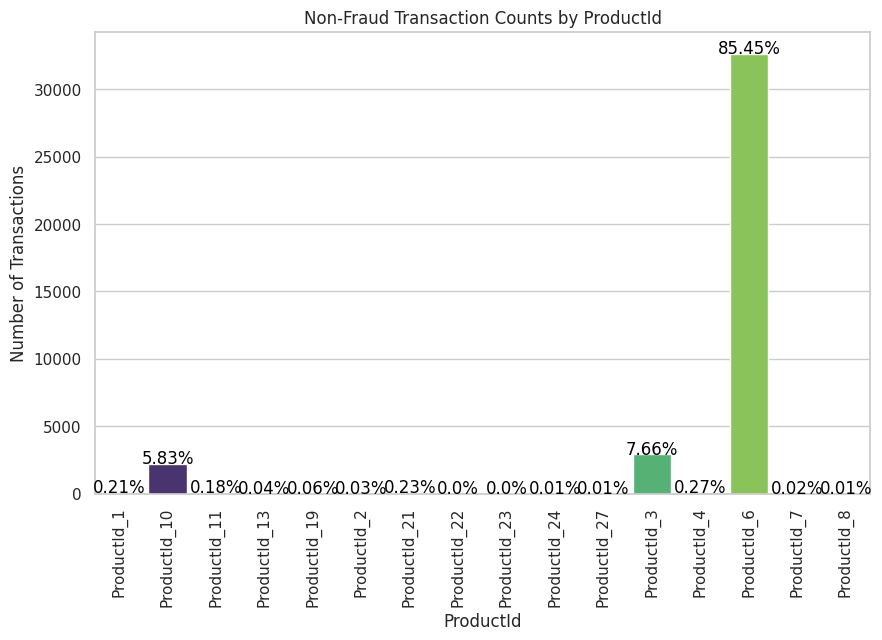

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count transactions per ProductId
product_counts_df = non_fraud_transactions.groupBy("ProductId").count()

# Calculate total transactions
total_transactions = product_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
product_counts_df = product_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Sort by ProductId
product_counts_df = product_counts_df.orderBy("ProductId")

# Convert to Pandas DataFrame for visualization
df_product = product_counts_df.toPandas()
df_product.rename(columns={'count': 'Transactions'}, inplace=True)
df_product['Percentage'] = df_product['Percentage'].round(2)
df_product['ProductId'] = df_product['ProductId'].astype(str)

# Visualization with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(df_product) * 0.4), 6))  # Dynamic width based on number of products
barplot = sns.barplot(x='ProductId', y='Transactions', data=df_product, palette="viridis")

# Add labels
barplot.set_xlabel("ProductId")
barplot.set_ylabel("Number of Transactions")
barplot.set_title("Non-Fraud Transaction Counts by ProductId")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add percentage labels above each bar
for idx, row in df_product.iterrows():
    barplot.text(idx, row['Transactions'], f"{row['Percentage']}%", color='black', ha="center")

plt.show()




### Observations

1. When a customer buys a Product with ids 10, 3 6 there can be a possibility of Fraud.


### - Which Product Category transactions are fraud ?

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10


# Count transactions per ProductCategory
category_counts_df = fraud_transactions.groupBy("ProductCategory").count()

# Calculate total transactions
total_transactions = category_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
category_counts_df = category_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Sort by ProductCategory
category_counts_df = category_counts_df.orderBy("ProductCategory")

# Convert to Pandas DataFrame for visualization
df_category = category_counts_df.toPandas()
df_category.rename(columns={'count': 'Transactions'}, inplace=True)
df_category['Percentage'] = df_category['Percentage'].round(2)
df_category['ProductCategory'] = df_category['ProductCategory'].astype(str)

# Prepare the ColumnDataSource
source = ColumnDataSource(df_category)

# Output to notebook
output_notebook()

# Create the figure with a dynamic width based on the number of categories
plot_width = max(600, len(df_category) * 40)

# Create the figure
p = figure(x_range=df_category['ProductCategory'],
           title="Fraud Transaction Counts by ProductCategory",
           toolbar_location=None, tools="",
           )

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='ProductCategory', top='Transactions', width=0.9, source=source,
       line_color='white',
       fill_color=factor_cmap('ProductCategory', palette=Spectral10, factors=df_category['ProductCategory']))

# Add percentage labels above each bar
labels = LabelSet(x='ProductCategory', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol for display
source.data['Percentage'] = [f"{pct}%" for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "ProductCategory"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = "vertical"

# Show the plot
show(p)



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20


# Count transactions per ProductCategory
category_counts_df = non_fraud_transactions.groupBy("ProductCategory").count()

# Calculate total transactions
total_transactions = category_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
category_counts_df = category_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Sort by ProductCategory
category_counts_df = category_counts_df.orderBy("ProductCategory")

# Convert to Pandas DataFrame for visualization
df_category = category_counts_df.toPandas()
df_category.rename(columns={'count': 'Transactions'}, inplace=True)
df_category['Percentage'] = df_category['Percentage'].round(2)
df_category['ProductCategory'] = df_category['ProductCategory'].astype(str)

# Prepare the ColumnDataSource
source = ColumnDataSource(df_category)

# Output to notebook
output_notebook()

# Create the figure with a dynamic width based on the number of categories
plot_width = max(600, len(df_category) * 40)

# Create the figure
p = figure(x_range=df_category['ProductCategory'],
           title="Non-Fraud Transaction Counts by ProductCategory",
           toolbar_location=None, tools="",
           )

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='ProductCategory', top='Transactions', width=0.9, source=source,
       line_color='white',
       fill_color=factor_cmap('ProductCategory', palette=Category20[20], factors=df_category['ProductCategory']))

# Add percentage labels above each bar
labels = LabelSet(x='ProductCategory', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol for display
source.data['Percentage'] = [f"{pct}%" for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "ProductCategory"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = "vertical"

# Show the plot
show(p)



## Observation
1. The majority of the fraud categories would be Financial and Airtime.

2. But In the non-fraud section too, the majority is financial and air time line.



### - Which Channel ID transactions are fraud ?

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.layouts import row
from bokeh.palettes import Spectral4


# Count transactions per ChannelId for both fraud and non-fraud transactions
fraud_channel_counts_df = fraud_transactions.groupBy("ChannelId").count()
non_fraud_channel_counts_df = non_fraud_transactions.groupBy("ChannelId").count()

# Calculate total transactions for both
fraud_total = fraud_channel_counts_df.groupBy().sum("count").collect()[0][0]
non_fraud_total = non_fraud_channel_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages for both
fraud_channel_counts_df = fraud_channel_counts_df.withColumn("Percentage", (F.col("count") / fraud_total) * 100)
non_fraud_channel_counts_df = non_fraud_channel_counts_df.withColumn("Percentage", (F.col("count") / non_fraud_total) * 100)

# Sort by ChannelId for both
fraud_channel_counts_df = fraud_channel_counts_df.orderBy("ChannelId")
non_fraud_channel_counts_df = non_fraud_channel_counts_df.orderBy("ChannelId")

# Convert to Pandas DataFrames for visualization
df_fraud_channel = fraud_channel_counts_df.toPandas()
df_non_fraud_channel = non_fraud_channel_counts_df.toPandas()

# Rename columns and round percentages for both DataFrames
df_fraud_channel.columns = ['ChannelId', 'Transactions', 'Percentage']
df_fraud_channel['Percentage'] = df_fraud_channel['Percentage'].round(2)
df_non_fraud_channel.columns = ['ChannelId', 'Transactions', 'Percentage']
df_non_fraud_channel['Percentage'] = df_non_fraud_channel['Percentage'].round(2)

# Prepare the ColumnDataSource for both
source_fraud = ColumnDataSource(df_fraud_channel)
source_non_fraud = ColumnDataSource(df_non_fraud_channel)

# Output to notebook
output_notebook()

# Create the figures
p1 = figure(x_range=source_fraud.data['ChannelId'],
            title="Fraudulent Transactions by ChannelId",
            toolbar_location=None, tools="")
p2 = figure(x_range=source_non_fraud.data['ChannelId'],
            title="Non-Fraudulent Transactions by ChannelId",
            toolbar_location=None, tools="")

# Add bar plots for both figures
p1.vbar(x='ChannelId', top='Transactions', width=0.9, source=source_fraud,
        line_color='white', fill_color=Spectral4[0])
p2.vbar(x='ChannelId', top='Transactions', width=0.9, source=source_non_fraud,
        line_color='white', fill_color=Spectral4[1])

# Add percentage labels for both plots
labels_fraud = LabelSet(x='ChannelId', y='Transactions', text='Percentage', source=source_fraud,
                        level='glyph', x_offset=-10, y_offset=0,
                        text_font_size="8pt", text_color="black", text_align="center")
labels_non_fraud = LabelSet(x='ChannelId', y='Transactions', text='Percentage', source=source_non_fraud,
                            level='glyph', x_offset=-10, y_offset=0,
                            text_font_size="8pt", text_color="black", text_align="center")

p1.add_layout(labels_fraud)
p2.add_layout(labels_non_fraud)

# Set axis labels and titles for both plots
p1.xaxis.axis_label = "ChannelId"
p1.yaxis.axis_label = "Number of Transactions"
p2.xaxis.axis_label = "ChannelId"
p2.yaxis.axis_label = "Number of Transactions"

# Convert percentages to string for display for both plots
source_fraud.data['Percentage'] = [f"{pct}%" for pct in source_fraud.data['Percentage']]
source_non_fraud.data['Percentage'] = [f"{pct}%" for pct in source_non_fraud.data['Percentage']]

# Show the plots
show(row(p1, p2))




### Observation
1. Channel ID 3 has the most fraud transactions happening when compared to little from channel 1

2. If we had known what channel is referring to, i.e. context we could have derived more insights.

3. Also, we could look into, account ID and channel relation, to see if fraud accounts/accounts are using this specific channel for conducting fraud

4. I mean there are many more possibilities of permutations and combinations. Something Decission Tree could model this better.

### - Amount/value vs transactions are fraud ?

In [ ]:
avg_fraud_amount = fraud_transactions.agg(F.mean("Amount")).collect()[0][0]

# Calculate the average amount for non-fraud transactions
avg_non_fraud_amount = non_fraud_transactions.agg(F.mean("Amount")).collect()[0][0]

# Print the results
print(f"Average Amount in Fraud Transactions: {avg_fraud_amount}")
print(f"Average Amount in Non-Fraud Transactions: {avg_non_fraud_amount}")


Average Amount in Fraud Transactions: -480201.0
Average Amount in Non-Fraud Transactions: -3869.5030772051127


### Observation

1. Fraud transaction mean amount is way greater than non-fraud transactions, In general, I believe fraud transactions have a very high amount value. Or It can be only some fraud transactions are high amount-based transactions which is causing the mean to shift. But visually when I see fraud transactions have more amount value.

2. Need to come up with better pricing during modeling like a simple mean model to threshold-based models etc and simple to complex ML models like DT.

### - What pricing strategy is leading to fraud ?


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10


# Count transactions per PricingStrategy
strategy_counts_df = fraud_transactions.groupBy("PricingStrategy").count()

# Calculate total transactions
total_transactions = strategy_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
strategy_counts_df = strategy_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Sort by PricingStrategy
strategy_counts_df = strategy_counts_df.orderBy("PricingStrategy")

# Convert to Pandas DataFrame for visualization
df_strategy = strategy_counts_df.toPandas()
df_strategy.rename(columns={'count': 'Transactions'}, inplace=True)
df_strategy['Percentage'] = df_strategy['Percentage'].round(2)
df_strategy['PricingStrategy'] = df_strategy['PricingStrategy'].astype(str)

# Prepare the ColumnDataSource
source = ColumnDataSource(df_strategy)

# Output to notebook
output_notebook()

# Create the figure
p = figure(x_range=df_strategy['PricingStrategy'],
           title="Fraud Transactions by Pricing Strategy",
           toolbar_location=None, tools="")

# Render a vertical bar with top aligned to the count of transactions
bars = p.vbar(x='PricingStrategy', top='Transactions', width=0.9, source=source,
              line_color='white',
              fill_color=factor_cmap('PricingStrategy', palette=Category10[4], factors=df_strategy['PricingStrategy']))

# Add percentage labels above each bar
labels = LabelSet(x='PricingStrategy', y='Transactions', text='Percentage', y_offset=8,
                  text_font_size="8pt", text_color="black",
                  source=source, text_align='center')
p.add_layout(labels)

# Formatting percentages to show two decimal places
source.data['Percentage'] = ['{:.2f}%'.format(pct) for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "Pricing Strategy"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.57  # Rotate labels for readability (90 degrees)

# Show the plot
show(p)




In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20

# Count transactions per PricingStrategy
strategy_counts_non_fraud_df = non_fraud_transactions.groupBy("PricingStrategy").count()

# Calculate total transactions
total_transactions_non_fraud = strategy_counts_non_fraud_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
strategy_counts_non_fraud_df = strategy_counts_non_fraud_df.withColumn("Percentage", (F.col("count") / total_transactions_non_fraud) * 100)

# Sort by PricingStrategy
strategy_counts_non_fraud_df = strategy_counts_non_fraud_df.orderBy("PricingStrategy")

# Convert to Pandas DataFrame for visualization
df_strategy_non_fraud = strategy_counts_non_fraud_df.toPandas()
df_strategy_non_fraud.rename(columns={'count': 'Transactions'}, inplace=True)
df_strategy_non_fraud['Percentage'] = df_strategy_non_fraud['Percentage'].round(2)
df_strategy_non_fraud['PricingStrategy'] = df_strategy_non_fraud['PricingStrategy'].astype(str)

# Prepare the ColumnDataSource
source = ColumnDataSource(df_strategy_non_fraud)

# Output to notebook
output_notebook()

# Create the figure
p = figure(x_range=df_strategy_non_fraud['PricingStrategy'],
           title="Non-Fraudulent Transactions by Pricing Strategy",
           toolbar_location=None, tools="")

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='PricingStrategy', top='Transactions', width=0.9, source=source,
       line_color='white',
       fill_color=factor_cmap('PricingStrategy', palette=Category20[len(df_strategy_non_fraud)], factors=df_strategy_non_fraud['PricingStrategy']))

# Add percentage labels above each bar
labels = LabelSet(x='PricingStrategy', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=0,
                  text_font_size="8pt", text_color="black",
                  text_baseline="middle", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol
source.data['Percentage'] = [f"{x}%" for x in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "Pricing Strategy"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.57  # Rotate labels for readability (90 degrees)

# Show the plot
show(p)



## Observation

1.  Generally pricing strategy 4 is leading to more fraud transactions than others.




### - Time VS Fraud ? (We only have start time of the transaction)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256

# Extract hour from the timestamp
fraud_transactions = fraud_transactions.withColumn("Hour", F.hour("TransactionStartTime"))

# Count transactions per hour
hourly_counts_df = fraud_transactions.groupBy("Hour").count()

# Calculate total transactions
total_transactions = hourly_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
hourly_counts_df = hourly_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Convert to Pandas DataFrame for visualization
df_hourly = hourly_counts_df.toPandas()
df_hourly.rename(columns={'count': 'Transactions'}, inplace=True)
df_hourly['Percentage'] = df_hourly['Percentage'].round(2)
df_hourly['Hour'] = df_hourly['Hour'].astype(str)  # Convert hour to string for categorical x-axis

# Prepare the ColumnDataSource
source = ColumnDataSource(df_hourly)

# Output to notebook
output_notebook()

# Create the figure
p = figure(x_range=df_hourly['Hour'],
           title="Fraudulent Transactions by Hour",
           toolbar_location=None, tools="")

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='Hour', top='Transactions', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('Hour', palette=Viridis256, factors=df_hourly['Hour']))

# Add percentage labels above each bar
labels = LabelSet(x='Hour', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol for display
source.data['Percentage'] = [f"{pct}%" for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "Hour of the Day"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.2  # radians, `math.pi/3` for diagonal

# Show the plot
show(p)




In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.transform import factor_cmap
from bokeh.palettes import Turbo256


# Extract hour from the timestamp
non_fraud_transactions = non_fraud_transactions.withColumn("Hour", F.hour("TransactionStartTime"))

# Count transactions per hour
hourly_counts_df = non_fraud_transactions.groupBy("Hour").count()

# Calculate total transactions
total_transactions = hourly_counts_df.groupBy().sum("count").collect()[0][0]

# Add a column for percentages
hourly_counts_df = hourly_counts_df.withColumn("Percentage", (F.col("count") / total_transactions) * 100)

# Convert to Pandas DataFrame for visualization
df_hourly = hourly_counts_df.toPandas()
df_hourly.rename(columns={'count': 'Transactions'}, inplace=True)
df_hourly['Percentage'] = df_hourly['Percentage'].round(2)
df_hourly['Hour'] = df_hourly['Hour'].astype(str)  # Convert hour to string for categorical x-axis

# Prepare the ColumnDataSource
source = ColumnDataSource(df_hourly)

# Output to notebook
output_notebook()

# Create the figure
p = figure(x_range=df_hourly['Hour'],
           title="Non-Fraudulent Transactions by Hour",
           toolbar_location=None, tools="")

# Render a vertical bar with top aligned to the count of transactions
p.vbar(x='Hour', top='Transactions', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('Hour', palette=Turbo256, factors=df_hourly['Hour']))

# Add percentage labels above each bar
labels = LabelSet(x='Hour', y='Transactions', text='Percentage', source=source,
                  level='glyph', x_offset=-10, y_offset=5,
                  text_font_size="8pt", text_color="black", text_align="center")
p.add_layout(labels)

# Convert the percentages to string and add the '%' symbol for display
source.data['Percentage'] = [f"{pct}%" for pct in source.data['Percentage']]

# Set axis labels
p.xaxis.axis_label = "Hour of the Day"
p.yaxis.axis_label = "Number of Transactions"

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = 1.2  # radians, `math.pi/3` for diagonal

# Show the plot
show(p)

# Stop Spark session
#spark.stop()


### Observation
1. No pattern

### Observation
#### weeks, months, days not much info to infer.

## FE

Here's a comprehensive list of potential features that could be engineered:

1. **Aggregated Features (on AccountId)**
   - Average transaction value.
   - Maximum transaction value.
   - Minimum transaction value.
   - Total number of transactions.
   - Standard deviation of transaction values.
   - Average value of credits (negative amounts).
   - Average value of debits (positive amounts).
   
2. **Temporal Features**
   - Time since the last transaction for the account.
   - Time until the next transaction for the account.
   - Average time between transactions for the account.
   - Is the transaction happening on a weekend or weekday?
   - Hour of the transaction.
   - Day, Month, and Year of the transaction.
   
3. **Behavioral Patterns**
   - Number of distinct products bought by the account.
   - Number of distinct providers interacted with by the account.
   - Number of distinct channels used by the account.
   - Ratio of credits to debits for the account.
   - Number of transactions in the last day, week, and month.
   
4. **Cross Features**
   - Interaction between PricingStrategy and Amount (e.g., multiplying them).
   - Interaction between ProviderId and ProductId (potential combined effect).
   
5. **Country and Currency**
   - Number of different currencies used by an account.
   - Number of different countries' transactions originated from by an account.
   
6. **Categorical Variable Transformations**
   - One-hot encoding of categorical variables like ChannelId, ProductCategory, etc.
   - Frequency encoding of high cardinality categorical variables.
   
7. **Anomaly Features**
   - Z-score of the transaction amount (how many standard deviations away is a transaction's amount from the mean).
   
8. **Rolling Window Features**
   - Average transaction value for the last X transactions.
   - Maximum transaction value in the last X transactions.
   - Number of transactions in the last X hours or days.

9. **Product and Provider Specific**
   - Total number of transactions per ProductId or ProviderId.
   - Average amount spent per ProductId or ProviderId.
   
10. **Others**
   - Length of customer's association with the platform (difference between the first transaction date and the current transaction date).
   - Number of different subscription types used by an account.


In [ ]:
# Using pandas to do FE




training_data_ = pd.read_csv('training.csv')
testing_data_ = pd.read_csv('test.csv')



In [ ]:
import numpy as np
import pandas as pd


# For Preprocessing common to both datasets
def preprocess_data(df):
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

    df['Weekday'] = df['TransactionStartTime'].dt.weekday
    df['WeekendFlag'] = (df['Weekday'] >= 5).astype(int)
    df['Debit'] = (df['Amount'] > 0).astype(int)
    return df

training_data_ = preprocess_data(training_data_)
testing_data_ = preprocess_data(testing_data_)

# To Concatenating training and testing data
all_df = pd.concat([training_data_, testing_data_]).reset_index(drop=True)
all_df = all_df.sort_values(by='TransactionStartTime').reset_index(drop=True)

# Function to replace inf, -inf, and NaN values with 0
def replace_invalid_values(df):
    df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    return df

# Feature Engineering Functions
def add_account_aggregated_features(df):
    grouped = df.groupby('AccountId')
    df['Account_AvgAmount'] = grouped['Amount'].transform('mean')
    df['Account_TotalTransactions'] = grouped['TransactionId'].transform('count')
    df['Account_AvgCreditAmount'] = df[df['Amount'] < 0].groupby('AccountId')['Amount'].transform('mean')
    df['Account_AvgDebitAmount'] = df[df['Amount'] > 0].groupby('AccountId')['Amount'].transform('mean')
    return replace_invalid_values(df)

def add_temporal_features(df):
    df['TimeSinceLastTransaction'] = df.groupby('AccountId')['TransactionStartTime'].diff().dt.total_seconds()
    df['TimeUntilNextTransaction'] = df.groupby('AccountId')['TransactionStartTime'].diff(-1).dt.total_seconds().abs()
    return replace_invalid_values(df)

def add_behavioral_cross_features(df):
    df['DistinctProducts'] = df.groupby('AccountId')['ProductId'].transform('nunique')
    df['DistinctProviders'] = df.groupby('AccountId')['ProviderId'].transform('nunique')
    df['DistinctChannels'] = df.groupby('AccountId')['ChannelId'].transform('nunique')
    df['CreditDebitRatio'] = df['Account_AvgCreditAmount'] / df['Account_AvgDebitAmount']
    df['AmountPricingStrategy'] = df['Amount'] * df['PricingStrategy']
    df['ProviderProductInteraction'] = df['ProviderId'] + df['ProductId']
    return replace_invalid_values(df)


def add_product_provider_features(df):
    df['TotalTransactionsPerProduct'] = df.groupby('ProductId')['TransactionId'].transform('count')
    df['AverageAmountPerProduct'] = df.groupby('ProductId')['Amount'].transform('mean')
    df['TotalTransactionsPerProvider'] = df.groupby('ProviderId')['TransactionId'].transform('count')
    df['AverageAmountPerProvider'] = df.groupby('ProviderId')['Amount'].transform('mean')
    return replace_invalid_values(df)

#  To Apply the feature engineering to the concatenated DataFrame
all_df = add_account_aggregated_features(all_df)
all_df = add_temporal_features(all_df)
all_df = add_behavioral_cross_features(all_df)
all_df = add_product_provider_features(all_df)

#  for Splitting back into train and test sets
training_data_enhanced = all_df.iloc[:len(training_data_)]
testing_data_enhanced = all_df.iloc[len(training_data_):]




In [ ]:
testing_data_enhanced.drop(columns=['FraudResult'],axis=1, inplace=True)

<ipython-input-154-b2cadb1e7dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data_enhanced.drop(columns=['FraudResult'],axis=1, inplace=True)


In [ ]:

def rearrange_columns(df, target_col):
    # Move target column to the end
    columns = [col for col in df.columns if col != target_col] + [target_col]
    return df[columns]

# Apply this to your DataFrames
training_data_enhanced = rearrange_columns(training_data_enhanced, 'FraudResult')



In [ ]:
#saving the FE datasets
training_data_enhanced.to_csv('training_data_enhanced.csv', header=True, index=False)
testing_data_enhanced.to_csv('testing_data_enhanced.csv', header=True, index=False)

In [ ]:
## loading into spark

training_data_enhanced_= spark.read.csv('training_data_enhanced.csv', header=True, inferSchema=True)
testing_data_enhanced_ = spark.read.csv('testing_data_enhanced.csv', header=True, inferSchema=True)


In [ ]:
training_data_enhanced_.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+-------+-----+--------------------+---------------+-------+-----------+-----+-------------------+-------------------------+-----------------------+----------------------+------------------------+------------------------+----------------+-----------------+----------------+----------------+---------------------+--------------------------+---------------------------+-----------------------+----------------------------+------------------------+-----------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId| Amount|Value|TransactionStartTime|PricingStrategy|Weekday|WeekendFlag|Debit|  Account_AvgAmount|Account_TotalTransactions|Account_AvgCreditAmount|Account_AvgDebitAmount|TimeSinceLastTransaction|TimeUnti

In [ ]:
testing_data_enhanced_.show()

+--------------------+--------------+--------------+-------------------+---------------+------------+-----------+------------+------------+------------------+-----------+-------+-----+--------------------+---------------+-------+-----------+-----+-------------------+-------------------------+-----------------------+----------------------+------------------------+------------------------+----------------+-----------------+----------------+----------------+---------------------+--------------------------+---------------------------+-----------------------+----------------------------+------------------------+
|       TransactionId|       BatchId|     AccountId|     SubscriptionId|     CustomerId|CurrencyCode|CountryCode|  ProviderId|   ProductId|   ProductCategory|  ChannelId| Amount|Value|TransactionStartTime|PricingStrategy|Weekday|WeekendFlag|Debit|  Account_AvgAmount|Account_TotalTransactions|Account_AvgCreditAmount|Account_AvgDebitAmount|TimeSinceLastTransaction|TimeUntilNextTransac

In [ ]:
# To Define the feature sets
categorical_cols = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy',	'Weekday',	'WeekendFlag',	'Debit', 'DistinctProducts',	'DistinctProviders',	'DistinctChannels' ,'ProviderProductInteraction']
numeric_cols = ['Amount', 'Value','Account_AvgAmount',	'Account_TotalTransactions',	'Account_AvgCreditAmount'	,'Account_AvgDebitAmount',	'TimeSinceLastTransaction',	'TimeUntilNextTransaction','CreditDebitRatio', 'AmountPricingStrategy',	'TotalTransactionsPerProduct'	,'AverageAmountPerProduct','TotalTransactionsPerProvider',	'AverageAmountPerProvider' ]
target_col = 'FraudResult'




In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.sql.functions import col


# Adjusting the StringIndexers in your pipeline
indexers = [StringIndexer(inputCol=c, outputCol=c+"_indexed", handleInvalid="keep").fit(training_data_enhanced_) for c in categorical_cols]

#  for OneHotEncoder for indexed categorical columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=c+"_encoded") for indexer, c in zip(indexers, categorical_cols)]

# VectorAssembler to create feature vectors (including both categorical and numeric features)
assemblerInputs = [c + "_encoded" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Random Forest Classifier alogrithm
rf = RandomForestClassifier(labelCol=target_col, featuresCol="features", seed=42)

#  for Building the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])

#  To Fit the model
model = pipeline.fit(training_data_enhanced_)

# To  Make predictions
predictions = model.transform(testing_data_enhanced_)


In [ ]:
predictions.select('TransactionID','prediction').show()

+--------------------+----------+
|       TransactionID|prediction|
+--------------------+----------+
| TransactionId_50600|       0.0|
| TransactionId_95109|       0.0|
| TransactionId_47357|       0.0|
| TransactionId_28185|       0.0|
| TransactionId_22140|       0.0|
|TransactionId_134338|       0.0|
|TransactionId_109096|       0.0|
| TransactionId_14249|       0.0|
| TransactionId_69896|       0.0|
| TransactionId_91468|       0.0|
| TransactionId_18862|       0.0|
| TransactionId_29342|       0.0|
|TransactionId_116873|       0.0|
| TransactionId_81197|       0.0|
| TransactionId_83120|       0.0|
| TransactionId_40882|       0.0|
| TransactionId_89297|       0.0|
|TransactionId_112716|       0.0|
| TransactionId_61794|       0.0|
|TransactionId_124957|       0.0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
#  To Rename 'prediction' column to 'FraudResult'
predictions_with_fraud_result = predictions.withColumnRenamed("prediction", "FraudResult")

#  To Display the 'TransactionID' and 'FraudResult' columns
predictions_with_fraud_result.select('TransactionID', 'FraudResult').show()

+--------------------+-----------+
|       TransactionID|FraudResult|
+--------------------+-----------+
| TransactionId_50600|        0.0|
| TransactionId_95109|        0.0|
| TransactionId_47357|        0.0|
| TransactionId_28185|        0.0|
| TransactionId_22140|        0.0|
|TransactionId_134338|        0.0|
|TransactionId_109096|        0.0|
| TransactionId_14249|        0.0|
| TransactionId_69896|        0.0|
| TransactionId_91468|        0.0|
| TransactionId_18862|        0.0|
| TransactionId_29342|        0.0|
|TransactionId_116873|        0.0|
| TransactionId_81197|        0.0|
| TransactionId_83120|        0.0|
| TransactionId_40882|        0.0|
| TransactionId_89297|        0.0|
|TransactionId_112716|        0.0|
| TransactionId_61794|        0.0|
|TransactionId_124957|        0.0|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
# Save the DataFrame to a CSV file
predictions_with_fraud_result.select('TransactionID', 'FraudResult').write.csv('rf12.csv', header=True, mode='overwrite')


## Testing with competetion score

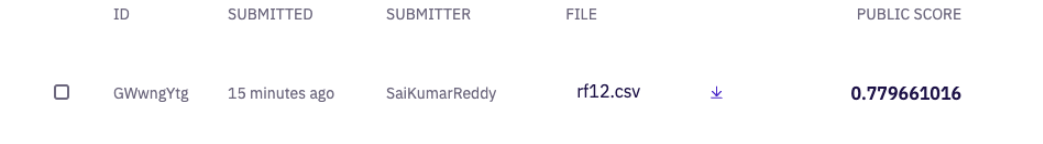

# These features are making sense

## Modelling

# 1. DT

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.feature import IndexToString
from pyspark.sql.functions import col


# StringIndexer for categorical columns
indexers = [StringIndexer(inputCol=c, outputCol=c+"_indexed", handleInvalid="keep").fit(training_data_enhanced_) for c in categorical_cols]

# OneHotEncoder for indexed categorical columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=c+"_encoded") for indexer, c in zip(indexers, categorical_cols)]

# VectorAssembler to create feature vectors
assemblerInputs = [c + "_encoded" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Decision Tree Classifier alogrithm
dt = DecisionTreeClassifier(labelCol=target_col, featuresCol="features", seed=42)

# Building the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, dt])

# Fit the model for the machine learning
model = pipeline.fit(training_data_enhanced_)


predictions = model.transform(testing_data_enhanced_)


In [ ]:
#  To Rename 'prediction' column to 'FraudResult'
predictions_with_fraud_result = predictions.withColumnRenamed("prediction", "FraudResult")

#  To Display the 'TransactionID' and 'FraudResult' columns
predictions_with_fraud_result.select('TransactionID', 'FraudResult').show()

+--------------------+-----------+
|       TransactionID|FraudResult|
+--------------------+-----------+
| TransactionId_50600|        0.0|
| TransactionId_95109|        0.0|
| TransactionId_47357|        0.0|
| TransactionId_28185|        0.0|
| TransactionId_22140|        0.0|
|TransactionId_134338|        0.0|
|TransactionId_109096|        0.0|
| TransactionId_14249|        0.0|
| TransactionId_69896|        0.0|
| TransactionId_91468|        0.0|
| TransactionId_18862|        0.0|
| TransactionId_29342|        0.0|
|TransactionId_116873|        0.0|
| TransactionId_81197|        0.0|
| TransactionId_83120|        0.0|
| TransactionId_40882|        0.0|
| TransactionId_89297|        0.0|
|TransactionId_112716|        0.0|
| TransactionId_61794|        0.0|
|TransactionId_124957|        0.0|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
# To  Save the DataFrame to a CSV file
predictions_with_fraud_result.select('TransactionID', 'FraudResult').write.csv('DT_001.csv', header=True, mode='overwrite')


## Testing with competetion score

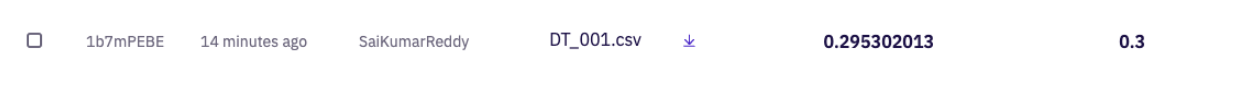

# 2. RF

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.sql.functions import col


# Adjusting the StringIndexers in your pipeline
indexers = [StringIndexer(inputCol=c, outputCol=c+"_indexed", handleInvalid="keep").fit(training_data_enhanced_) for c in categorical_cols]

# One HotEncoder for indexed categorical columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=c+"_encoded") for indexer, c in zip(indexers, categorical_cols)]

# VectorAssembler to create feature vectors (including both categorical and numeric features)
assemblerInputs = [c + "_encoded" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Random Forest Classifier
rf = RandomForestClassifier(labelCol=target_col, featuresCol="features", seed=42)

# Building the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])

# Fit the model
model = pipeline.fit(training_data_enhanced_)


# Make predictions
predictions = model.transform(testing_data_enhanced_)


In [ ]:
# Rename 'prediction' column to 'FraudResult'
predictions_with_fraud_result = predictions.withColumnRenamed("prediction", "FraudResult")

#  to Display the 'TransactionID' and 'FraudResult' columns
predictions_with_fraud_result.select('TransactionID', 'FraudResult').show()

+--------------------+-----------+
|       TransactionID|FraudResult|
+--------------------+-----------+
| TransactionId_50600|        0.0|
| TransactionId_95109|        0.0|
| TransactionId_47357|        0.0|
| TransactionId_28185|        0.0|
| TransactionId_22140|        0.0|
|TransactionId_134338|        0.0|
|TransactionId_109096|        0.0|
| TransactionId_14249|        0.0|
| TransactionId_69896|        0.0|
| TransactionId_91468|        0.0|
| TransactionId_18862|        0.0|
| TransactionId_29342|        0.0|
|TransactionId_116873|        0.0|
| TransactionId_81197|        0.0|
| TransactionId_83120|        0.0|
| TransactionId_40882|        0.0|
| TransactionId_89297|        0.0|
|TransactionId_112716|        0.0|
| TransactionId_61794|        0.0|
|TransactionId_124957|        0.0|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
#  To Save the DataFrame to a CSV file
predictions_with_fraud_result.select('TransactionID', 'FraudResult').write.csv('rf12.csv', header=True, mode='overwrite')


## Testing with competetion score

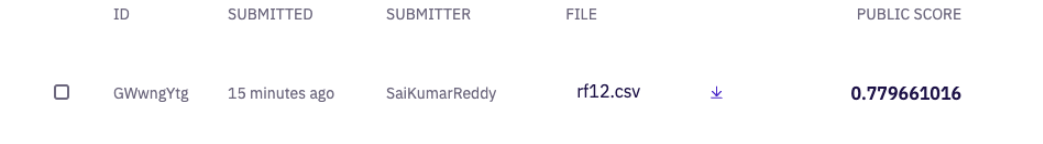

# 3. GBDT

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# StringIndexer for categorical columns
indexers = [StringIndexer(inputCol=c, outputCol=c+"_indexed", handleInvalid="keep").fit(training_data_enhanced_) for c in categorical_cols]

# OneHotEncoder for indexed categorical columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=c+"_encoded") for indexer, c in zip(indexers, categorical_cols)]

# VectorAssembler to create feature vectors
assemblerInputs = [c + "_encoded" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Gradient Boosted Decision Trees Classifier
gbt = GBTClassifier(labelCol=target_col, featuresCol="features", seed=42)

# Building the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, gbt])

# Fit the model for the machine learning
model = pipeline.fit(training_data_enhanced_)

#  TO Prepare test data and predict
predictions = model.transform(testing_data_enhanced_)


In [ ]:
#  To Rename 'prediction' column to 'FraudResult'
predictions_with_fraud_result = predictions.withColumnRenamed("prediction", "FraudResult")

# To  Display the 'TransactionID' and 'FraudResult' columns
predictions_with_fraud_result.select('TransactionID', 'FraudResult').show()

# to Save the DataFrame to a CSV file
predictions_with_fraud_result.select('TransactionID', 'FraudResult').write.csv('GBDT_001.csv', header=True, mode='overwrite')


+--------------------+-----------+
|       TransactionID|FraudResult|
+--------------------+-----------+
| TransactionId_50600|        0.0|
| TransactionId_95109|        0.0|
| TransactionId_47357|        0.0|
| TransactionId_28185|        0.0|
| TransactionId_22140|        0.0|
|TransactionId_134338|        0.0|
|TransactionId_109096|        0.0|
| TransactionId_14249|        0.0|
| TransactionId_69896|        0.0|
| TransactionId_91468|        0.0|
| TransactionId_18862|        0.0|
| TransactionId_29342|        0.0|
|TransactionId_116873|        0.0|
| TransactionId_81197|        0.0|
| TransactionId_83120|        0.0|
| TransactionId_40882|        0.0|
| TransactionId_89297|        0.0|
|TransactionId_112716|        0.0|
| TransactionId_61794|        0.0|
|TransactionId_124957|        0.0|
+--------------------+-----------+
only showing top 20 rows



## Testing with Competetion score


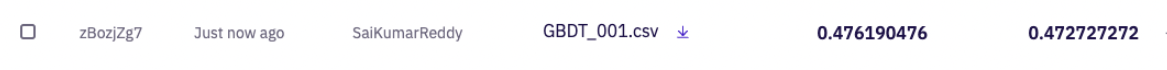

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

#  To StringIndexer for categorical columns
indexers = [StringIndexer(inputCol=c, outputCol=c+"_indexed", handleInvalid="keep").fit(training_data_enhanced_) for c in categorical_cols]

# OneHotEncoder for indexed categorical columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=c+"_encoded") for indexer, c in zip(indexers, categorical_cols)]

#  we are VectorAssembler to create feature vectors for the model
assemblerInputs = [c + "_encoded" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")


svm = LinearSVC(labelCol=target_col, featuresCol="features", maxIter=10, regParam=0.1)


pipeline = Pipeline(stages=indexers + encoders + [assembler, svm])
model = pipeline.fit(training_data_enhanced_)


predictions = model.transform(testing_data_enhanced_)

#  To Rename 'prediction' column to 'FraudResult'
predictions_with_fraud_result = predictions.withColumnRenamed("prediction", "FraudResult")

# Display the 'TransactionID' and 'FraudResult' columns
predictions_with_fraud_result.select('TransactionID', 'FraudResult').show()

# To Save the DataFrame to a CSV file
predictions_with_fraud_result.select('TransactionID', 'FraudResult').write.csv('svm_001.csv', header=True, mode='overwrite')


+--------------------+-----------+
|       TransactionID|FraudResult|
+--------------------+-----------+
| TransactionId_50600|        0.0|
| TransactionId_95109|        0.0|
| TransactionId_47357|        0.0|
| TransactionId_28185|        0.0|
| TransactionId_22140|        0.0|
|TransactionId_134338|        0.0|
|TransactionId_109096|        0.0|
| TransactionId_14249|        0.0|
| TransactionId_69896|        0.0|
| TransactionId_91468|        0.0|
| TransactionId_18862|        0.0|
| TransactionId_29342|        0.0|
|TransactionId_116873|        0.0|
| TransactionId_81197|        0.0|
| TransactionId_83120|        0.0|
| TransactionId_40882|        0.0|
| TransactionId_89297|        0.0|
|TransactionId_112716|        0.0|
| TransactionId_61794|        0.0|
|TransactionId_124957|        0.0|
+--------------------+-----------+
only showing top 20 rows



## Testing with competetion score

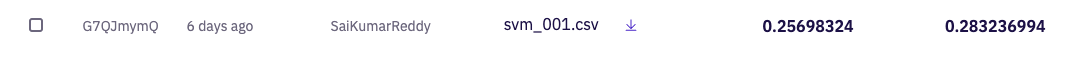

## 4. KNN

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# StringIndexer for categorical columns
indexers = [StringIndexer(inputCol=c, outputCol=c+"_indexed", handleInvalid="keep").fit(training_data_enhanced_) for c in categorical_cols]

# OneHotEncoder for indexed categorical columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=c+"_encoded") for indexer, c in zip(indexers, categorical_cols)]

# VectorAssembler to create feature vectors for the machine learing model
assemblerInputs = [c + "_encoded" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
lr = LogisticRegression(featuresCol="features", labelCol=target_col)
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])
model = pipeline.fit(training_data_enhanced_)

predictions = model.transform(testing_data_enhanced_)

#   to Rename 'prediction' column to 'FraudResult'
predictions_with_fraud_result = predictions.withColumnRenamed("prediction", "FraudResult")

# to Save the DataFrame to a CSV file
predictions_with_fraud_result.select('TransactionID', 'FraudResult').write.csv('logistic_001.csv', header=True, mode='overwrite')



# Testing with competition score

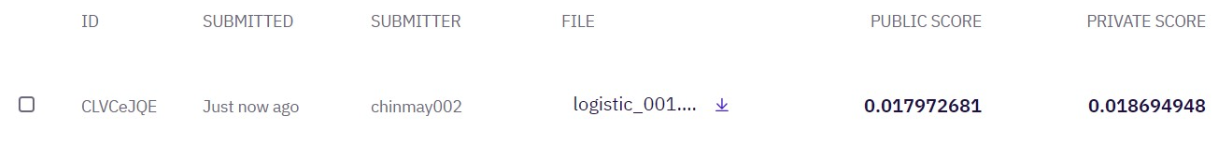

# Conclusion
## GBDT and RF were good performing models.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#  TO Initialize Spark Session
spark = SparkSession.builder.appName("Fraud Detection").getOrCreate()

#  To Read Data
training_data = spark.read.csv("training.csv", header=True, inferSchema=True)
test_data = spark.read.csv("test.csv", header=True, inferSchema=True)

#  The Data Splitting
train_df, test_df = training_data.randomSplit([0.8, 0.2], seed=42)



# The Machine Learning Pipeline
categorical_cols = [...] # list of categorical column names
numeric_cols = [...] # list of numerical column names

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(train_df) for column in categorical_cols]
encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=[col+"_encoded" for col in categorical_cols])

assembler = VectorAssembler(inputCols=[col+"_encoded" for col in categorical_cols] + numeric_cols, outputCol="features")

classifier = RandomForestClassifier(featuresCol="features", labelCol="FraudResult")

pipeline = Pipeline(stages=indexers + [encoder, assembler, classifier])

#  for the Model Training
model = pipeline.fit(train_df)

#  for Predictions
predictions = model.transform(test_df)

# Evaluation (if needed)
evaluator = BinaryClassificationEvaluator(labelCol="FraudResult")
accuracy = evaluator.evaluate(predictions)

# Post-Processing
# Convert predictions to desired format or extract necessary information

#  to Stop Spark Session
spark.stop()
